<style>
    .jp-CodeCell .jp-InputArea {
        display: none;
    }
</style>

<style>
 
{
  margin: 0;
  padding: 0;
  box-sizing: border-box;}

  body {
  margin-left: -24px;
  margin-top: 0;
  font-family: "Arial", sans-serif;
  width: 100%;
  height: 100vh;
  display: flex;
  flex-direction: column;
  justify-content: space-between;
  box-sizing: border-box;
}
  .title {
    text-align: center;
    font-size: 36px; 
    font-weight: bold;
    align-items: center;
    margin-top: 50px; 
  }
  .subtitle {
    text-align: center;
    font-size: 28px; 
    font-weight: bold;
    align-items: center;
    margin-bottom: 30px;
  }
  .logo {
    text-align: center;
    margin: 50px 0; 
    align-items: center;
  }
  .project-title {
    text-align: center;
    font-size: 28px; 
    font-weight: bold;
    align-items: center;
    margin: 40px 0; 
  }
  .authors {
    font-size: 20px; 
    text-align: center;
    margin-bottom: 50px;
    align-items: center;
  }
</style>

<div class="title">POLITECHNIKA LUBELSKA</div>
<div class="subtitle">WYDZIAŁ MATEMATYKI I INFORMATYKI TECHNICZNEJ</div>
<div class="subtitle">Kierunek: Inżynieria i Analiza Danych</div>

<div class="logo">
  <img src="logopl.png" alt="Logo Politechniki Lubelskiej" width="300"> <!-- Większe logo -->
</div>

<div class="project-title">Projekt Zaliczeniowy z Zakresu Analizy Danych</div>
<div class="subtitle"><em>Praca wykonana przez:</em></div>
<div class="authors">
  <strong>Mateusz Drozd, Nr albumu: s100966</strong> <br>
  <strong>Jakub Kalita, Nr albumu: s100976</strong> <br>
  <strong>Bartosz Oleszek, Nr albumu: s100996</strong>
</div>


# Załadowanie potrzebnych bibliotek

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
from pycaret.anomaly import *
from pycaret.classification import *
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.decomposition import *
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.feature_selection import *
import matplotlib.pyplot as plt
import seaborn as sns
import dtale as dt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.svm import SVC as SVM
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1\) Opis zbioru danych
W ramach tego projektu dokonana zostanie analiza zbioru danych zatytułowanego "Bangalore's Traffic Pulse: Insights into Urban Congestion and Commuter Behavior". Zbiór ten, udostępniony na platformie Kaggle przez użytkownika Preetham Gouda, zawiera 16 kolumn i 8936 wierszy, które opisują różnorodne aspekty ruchu drogowego w Bangalore. Dane zostały zebrane w regularnych odstępach czasowych (co jeden dzień) i przedstawiają szczegółowe informacje dotyczące ruchu drogowego, zachowań użytkowników oraz warunków środowiskowych. Dane zostały zebrane w okresie od 2022-01-01 do 2024-08-09.

## Wczytanie zbioru danych i podstawowe informacje

In [550]:
data = pd.read_csv("Banglore_traffic_Dataset.csv", sep=",")
df = pd.DataFrame(data)
df.iloc[:,0:8].head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000


In [551]:
df.iloc[:,8:].head()

,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [552]:
print("Podstawowe informacje o zbiorze danych:")
print(df.info())

Podstawowe informacje o zbiorze danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Tra

In [553]:
print("Ilość brakujących wartości w zbiorze: ")
print(df.isnull().sum())

Ilość brakujących wartości w zbiorze: 
Date                                  0
Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
dtype: int64


# Opis cech występujących w zbiorze:

1. **Date (object)**:
   - Data, kiedy zostały zebrane dane.
   - Wartości są zapisane w formacie tekstowym (np. "2023-01-15").

2. **Area Name (object)**:
   - Nazwa obszaru w Bangalore, w którym zebrano dane.
   - Przykładowe obszary: "Koramangala", "Whitefield".

3. **Road/Intersection Name (object)**:
   - Nazwa drogi lub skrzyżowania, którego dotyczą dane.
   - Przykłady: "MG Road", "BTM Layout Signal".

4. **Traffic Volume (int64)**:
   - Liczba pojazdów przejeżdżających przez dany odcinek drogi w określonym czasie.
   - Wartość liczbowa, która opisuje intensywność ruchu drogowego.

5. **Average Speed (float64)**:
   - Średnia prędkość pojazdów poruszających się na analizowanym odcinku (w km/h).
   - Wskazuje na warunki ruchu: im niższa wartość, tym większe prawdopodobieństwo korków.

6. **Travel Time Index (float64)**:
   - Stosunek czasu podróży w godzinach szczytu do czasu podróży w warunkach swobodnego przepływu.
   - Wyższe wartości oznaczają większe opóźnienia spowodowane zatłoczeniem.

7. **Congestion Level (float64)**:
   - Procentowa miara zatłoczenia drogi, obliczana jako stosunek liczby pojazdów do pojemności drogi.
   - Wartości w zakresie 0-100%, gdzie wyższe wartości wskazują na większe zatłoczenie.

8. **Road Capacity Utilization (float64)**:
   - Procentowe wykorzystanie pojemności drogi w danym momencie.
   - Informacja ta jest kluczowa dla zarządzania ruchem i planowania infrastruktury.

9. **Incident Reports (int64)**:
   - Liczba zgłoszonych incydentów, takich jak wypadki lub kolizje.

10. **Environmental Impact (float64)**:
    - Wskaźnik oceniający wpływ ruchu drogowego na środowisko, mierzony w skali numerycznej.

11. **Public Transport Usage (float64)**:
    - Procent osób korzystających z transportu publicznego w danym obszarze.

12. **Traffic Signal Compliance (float64)**:
    - Odsetek kierowców przestrzegających sygnalizacji świetlnej.
    - Wyższe wartości wskazują na lepszą dyscyplinę drogową.

13. **Parking Usage (float64)**:
    - Procent wykorzystania miejsc parkingowych w danym obszarze.
    - Dane te pomagają w ocenie obciążenia parkingów.

14. **Pedestrian and Cyclist Count (int64)**:
    - Liczba pieszych i rowerzystów w danym obszarze.

15. **Weather Conditions (object)**:
    - Warunki pogodowe w momencie zbierania danych.
    - Możliwe wartości:
      - **"Clear"** – jasne
      - **"Overcast"** – pochmurne
      - **"Fog"** – mgła
      - **"Rainy"** – deszczowe
      - **"Other"** – inne nietypowe warunki

16. **Roadwork and Construction Activity (object)**:
    - Zmienna kategoryczna wskazująca, czy na drodze odbywają się prace drogowe lub budowlane.
    - Przyjmuje wartości:
      - **"Yes"** – występują prace drogowe i budowlane
      - **"No"** – brak prac drogowych i budowlanych

# Cel analizy

Celem analizy jest zbudowanie modelu (klasyfikacyjnego) do przewidywania wartości zmiennej **Roadwork and Construction Activity**, czyli określenia, czy na danym obszarze występują prace drogowe lub budowlane. W modelu uwzględniono wszystkie zmienne numeryczne oraz zmienną kategoryczną **Weather Conditions**. Zmienne takie jak data, nazwa obszaru oraz nazwa ulicy zostały pominięte, ponieważ trudno byłoby je uwzględnić w modelu i sensownie zinterpretować. 

## 2\) Statystyki opisowe dla 5 wybranych cech

## *Wartości dla Traffic Volume* :

In [554]:
print('Wartość średnia: %.4f' %df.iloc[:,3].mean())
print("Wartość maksymalna : %.4f" %df.iloc[:,3].max())
print("Wartość minimalna: %.4f" %df.iloc[:,3].min())
print("Odchylenie standardowe %.4f" %df.iloc[:,3].std())
print('Wariancja: %.4f' %df.iloc[:,3].var())
print('Skośność: %.4f' %st.skew(df.iloc[:,3]))
print('Kurtoza: %.3f' %st.kurtosis(df.iloc[:,3]))
print('Kwantyl rzędu 0.25: %.4f' %np.quantile(df.iloc[:,3], q=0.25))
print('Kwantyl rzędu 0.5: %.4f' %np.quantile(df.iloc[:,3], q=0.5))
print('Kwantyl rzędu 0.75: %.4f' %np.quantile(df.iloc[:,3], q=0.75))

Wartość średnia: 29236.0481
Wartość maksymalna : 72039.0000
Wartość minimalna: 4233.0000
Odchylenie standardowe 13001.8088
Wariancja: 169047032.1040
Skośność: 0.4595
Kurtoza: -0.302
Kwantyl rzędu 0.25: 19413.0000
Kwantyl rzędu 0.5: 27600.0000
Kwantyl rzędu 0.75: 38058.5000


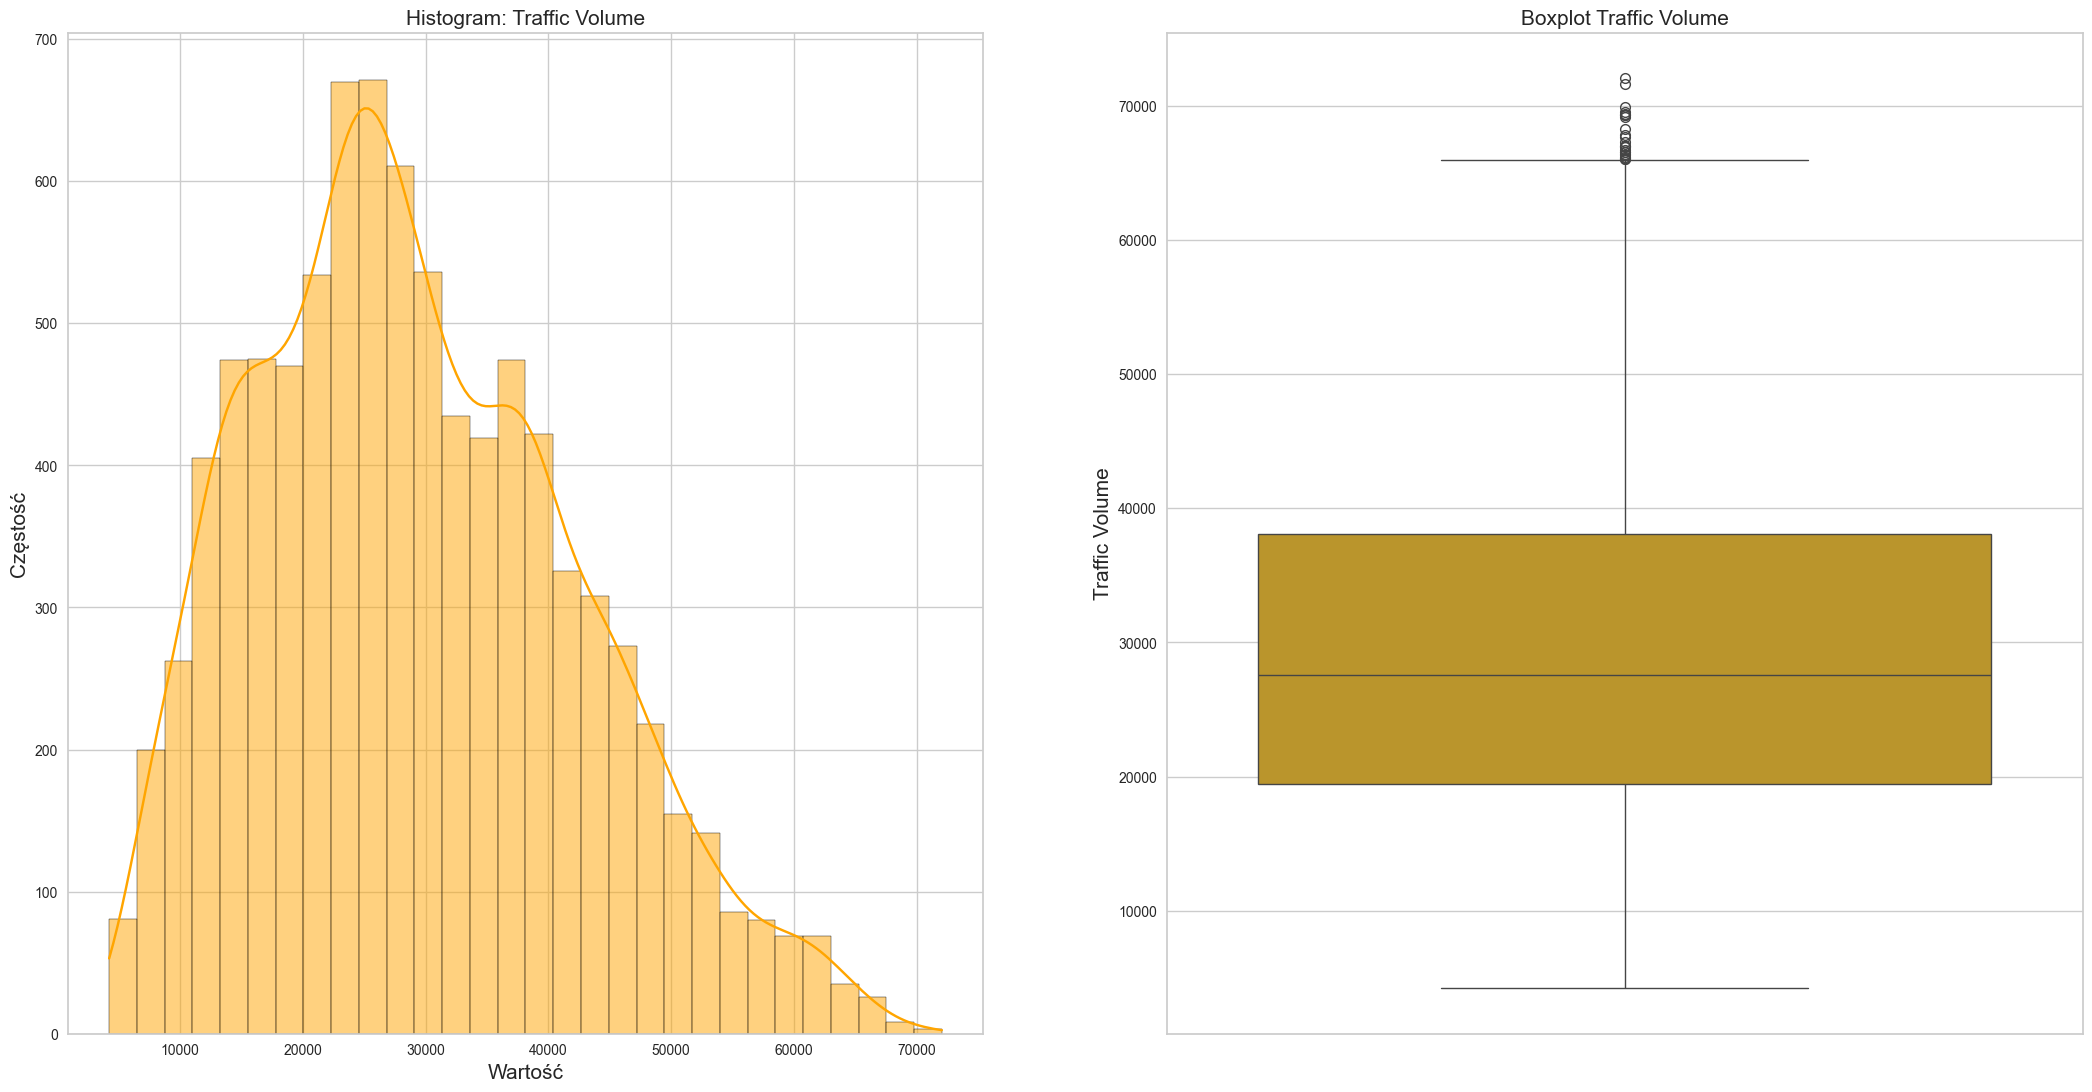

In [555]:
plt.figure(figsize=(26,13))

plt.subplot(121)
sns.histplot(df["Traffic Volume"], kde=True, color="orange", bins=30)
plt.title(f"Histogram: Traffic Volume", fontsize=15)
plt.xlabel("Wartość", fontsize=15)
plt.ylabel("Częstość", fontsize=15)


plt.subplot(122)
sns.boxplot(data=df.iloc[:,3], color="#d2a114")
plt.title("Boxplot Traffic Volume",fontsize=15)
plt.xticks(rotation=45, fontsize=15)

plt.ylabel("Traffic Volume", fontsize=15)
plt.show()

### Histogram:

- Dane mają prawie symetryczny kształt z lekką asymetrią prawostronną, co potwierdza wartość skośności (0,4595).  
- Najwięcej wartości skupia się w przedziale 20,000 - 40,000, co jest widoczne w najwyższych słupkach.  
- Liniowy przebieg rozkładu (pomarańczowa linia) sugeruje bliskość do rozkładu normalnego, chociaż widoczne są niewielkie odstępstwa w prawym ogonie (wyższe wartości).  

---

### Boxplot:

- Boxplot pokazuje statystyczny rozkład danych oraz obecność wartości odstających.  
- Wartości w przedziale między 25% (19413) a 75% (38058,5) stanowią większość danych (IQR – interquartile range).  
- Widzimy kilka wartości odstających w przedziale powyżej 60,000, co wskazuje na sporadyczne wystąpienia wyjątkowo wysokiego wolumenu ruchu.  
- Mediana (27600) znajduje się bliżej dolnego kwartyla, co potwierdza lekką asymetrię.

# *Wartości dla Average Speed* :

In [444]:
print('Wartość średnia: %.4f' %df.iloc[:,4].mean())
print("Wartość maksymalna : %.4f" %df.iloc[:,4].max())
print("Wartość minimalna: %.4f" %df.iloc[:,4].min())
print("Odchylenie standardowe %.4f" %df.iloc[:,4].std())
print('Wariancja: %.4f' %df.iloc[:,4].var())
print('Skośność: %.4f' %st.skew(df.iloc[:,4]))
print('Kurtoza: %.3f' %st.kurtosis(df.iloc[:,4]))
print('Kwantyl rzędu 0.25: %.4f' %np.quantile(df.iloc[:,4], q=0.25))
print('Kwantyl rzędu 0.5: %.4f' %np.quantile(df.iloc[:,4], q=0.5))
print('Kwantyl rzędu 0.75: %.4f' %np.quantile(df.iloc[:,4], q=0.75))

Wartość średnia: 39.4474
Wartość maksymalna : 89.7908
Wartość minimalna: 20.0000
Odchylenie standardowe 10.7072
Wariancja: 114.6451
Skośność: 0.2432
Kurtoza: -0.216
Kwantyl rzędu 0.25: 31.7758
Kwantyl rzędu 0.5: 39.1994
Kwantyl rzędu 0.75: 46.6445


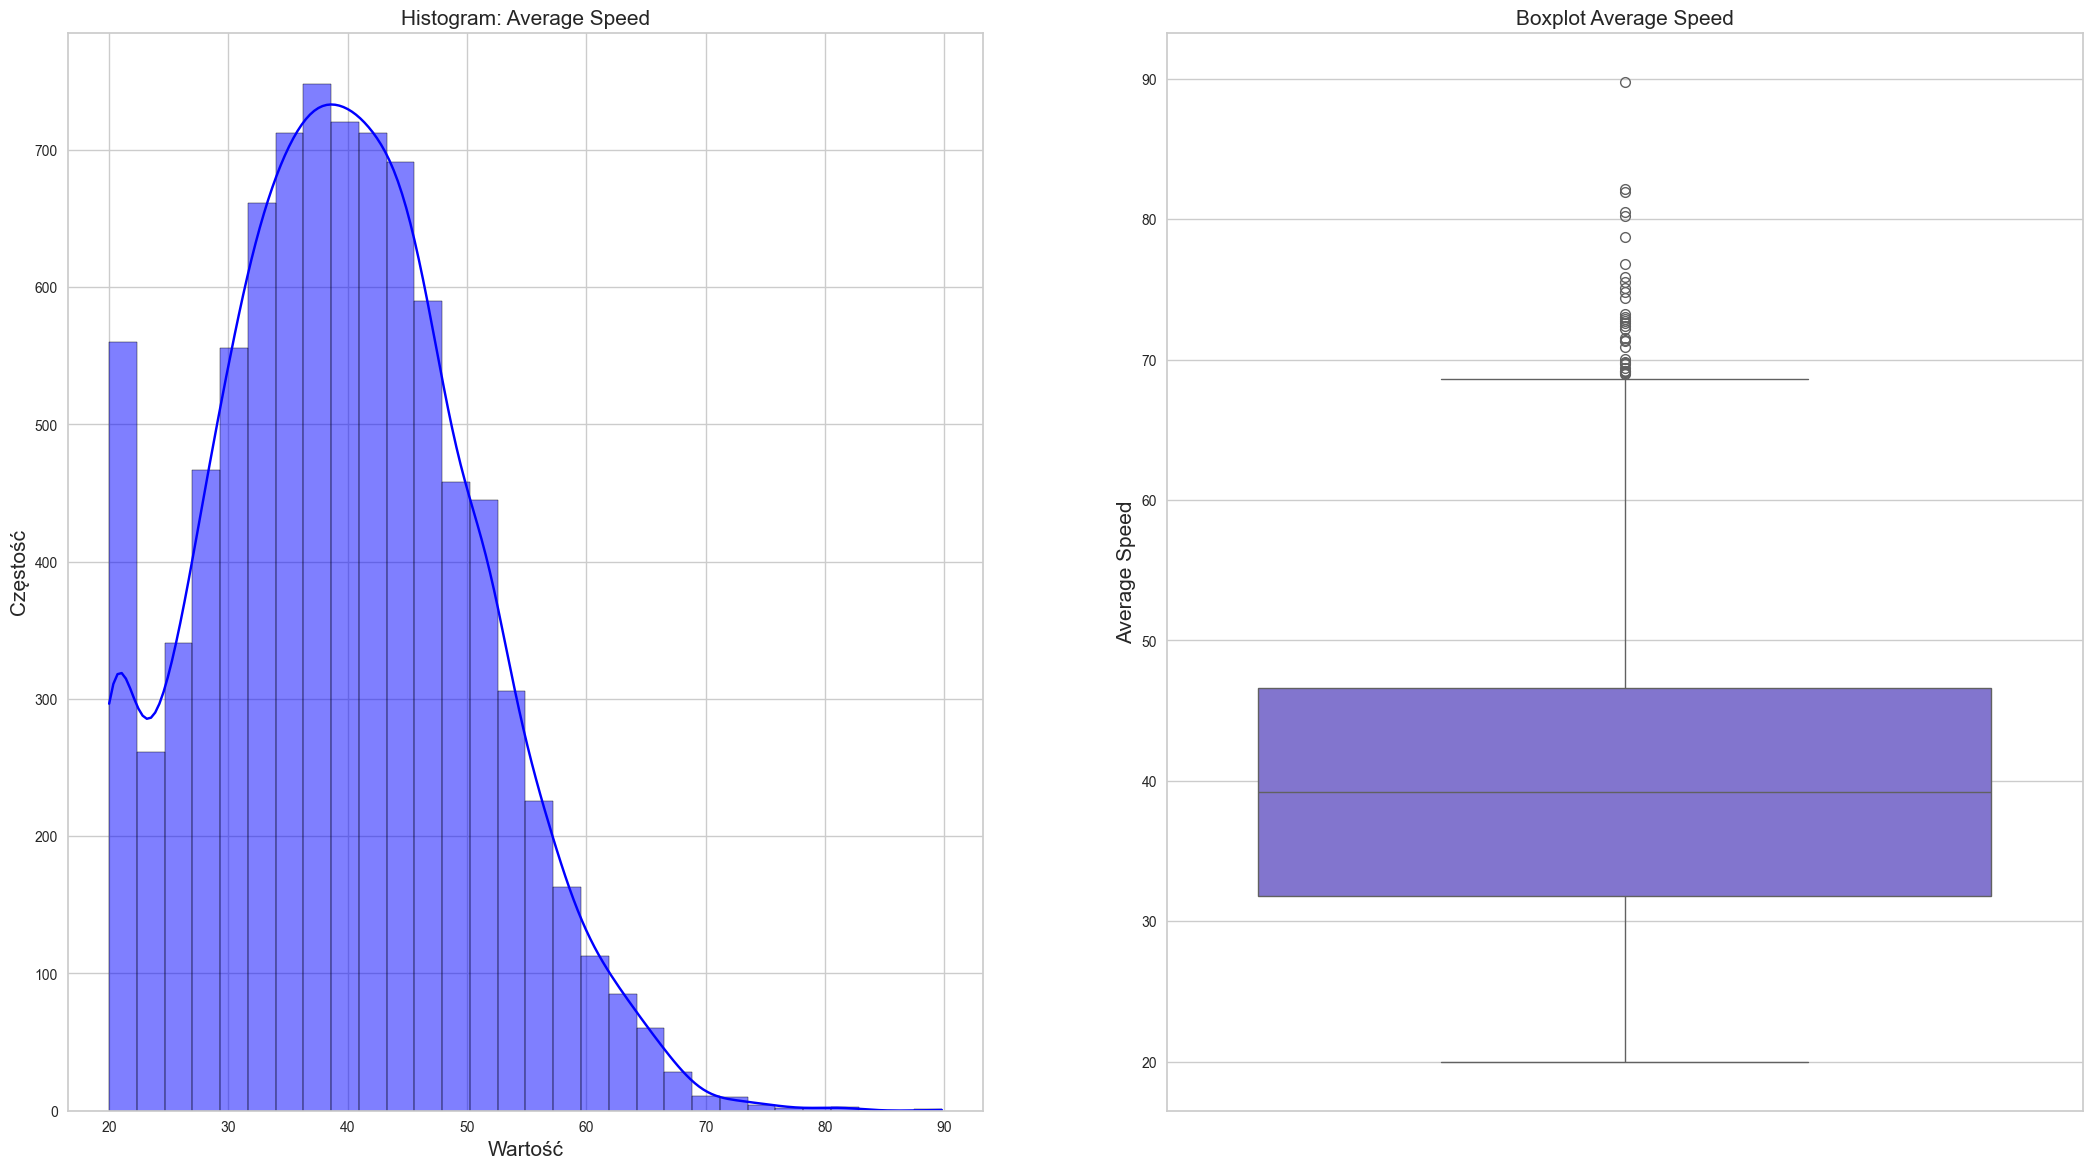

In [445]:
plt.figure(figsize=(26,14))

plt.subplot(121)
sns.histplot(df["Average Speed"], kde=True, color="blue", bins=30)
plt.title(f"Histogram: Average Speed", fontsize=15)
plt.xlabel("Wartość", fontsize=15)
plt.ylabel("Częstość", fontsize=15)



plt.subplot(122)
sns.boxplot(data=df.iloc[:,4], color="#76d")
plt.title("Boxplot Average Speed",fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.ylabel("Average Speed", fontsize=15)
plt.show()

### Histogram:
  
- Większość danych skupia się w przedziale 30–50 km/h, co odpowiada najwyższym słupkom histogramu.  
- Rozkład ma lekko asymetryczny prawostronny kształt, co sugeruje, że sporadycznie występują wyższe prędkości (powyżej 50 km/h), choć nie są one dominujące.  
- Liniowy przebieg rozkładu (niebieska linia) wskazuje na bliskość do rozkładu normalnego.  

---

### Boxplot

- Boxplot prezentuje statystyczny rozkład średnich prędkości, uwzględniając wartości odstające.  
- Przedział między 25% (31,78) a 75% (46,64) zawiera większość danych (IQR – interquartile range).  
- Widzimy kilka wartości odstających powyżej 70 km/h, co wskazuje na sporadyczne przypadki bardzo wysokich prędkości.  
- Mediana (39,20) znajduje się w centrum przedziału, co wskazuje na względną równowagę danych wokół średniej.

# *Wartości dla Public Transport Usage* :

In [446]:
print('Wartość średnia: %.4f' %df.iloc[:,10].mean())
print("Wartość maksymalna : %.4f" %df.iloc[:,10].max())
print("Wartość minimalna: %.4f" %df.iloc[:,10].min())
print("Odchylenie standardowe %.4f" %df.iloc[:,10].std())
print('Wariancja: %.4f' %df.iloc[:,10].var())
print('Skośność: %.4f' %st.skew(df.iloc[:,10]))
print('Kurtoza: %.3f' %st.kurtosis(df.iloc[:,10]))
print('Kwantyl rzędu 0.25: %.4f' %np.quantile(df.iloc[:,10], q=0.25))
print('Kwantyl rzędu 0.5: %.4f' %np.quantile(df.iloc[:,10], q=0.5))
print('Kwantyl rzędu 0.75: %.4f' %np.quantile(df.iloc[:,10], q=0.75))

Wartość średnia: 45.0867
Wartość maksymalna : 79.9797
Wartość minimalna: 10.0069
Odchylenie standardowe 20.2085
Wariancja: 408.3819
Skośność: -0.0099
Kurtoza: -1.199
Kwantyl rzędu 0.25: 27.3412
Kwantyl rzędu 0.5: 45.1707
Kwantyl rzędu 0.75: 62.4265


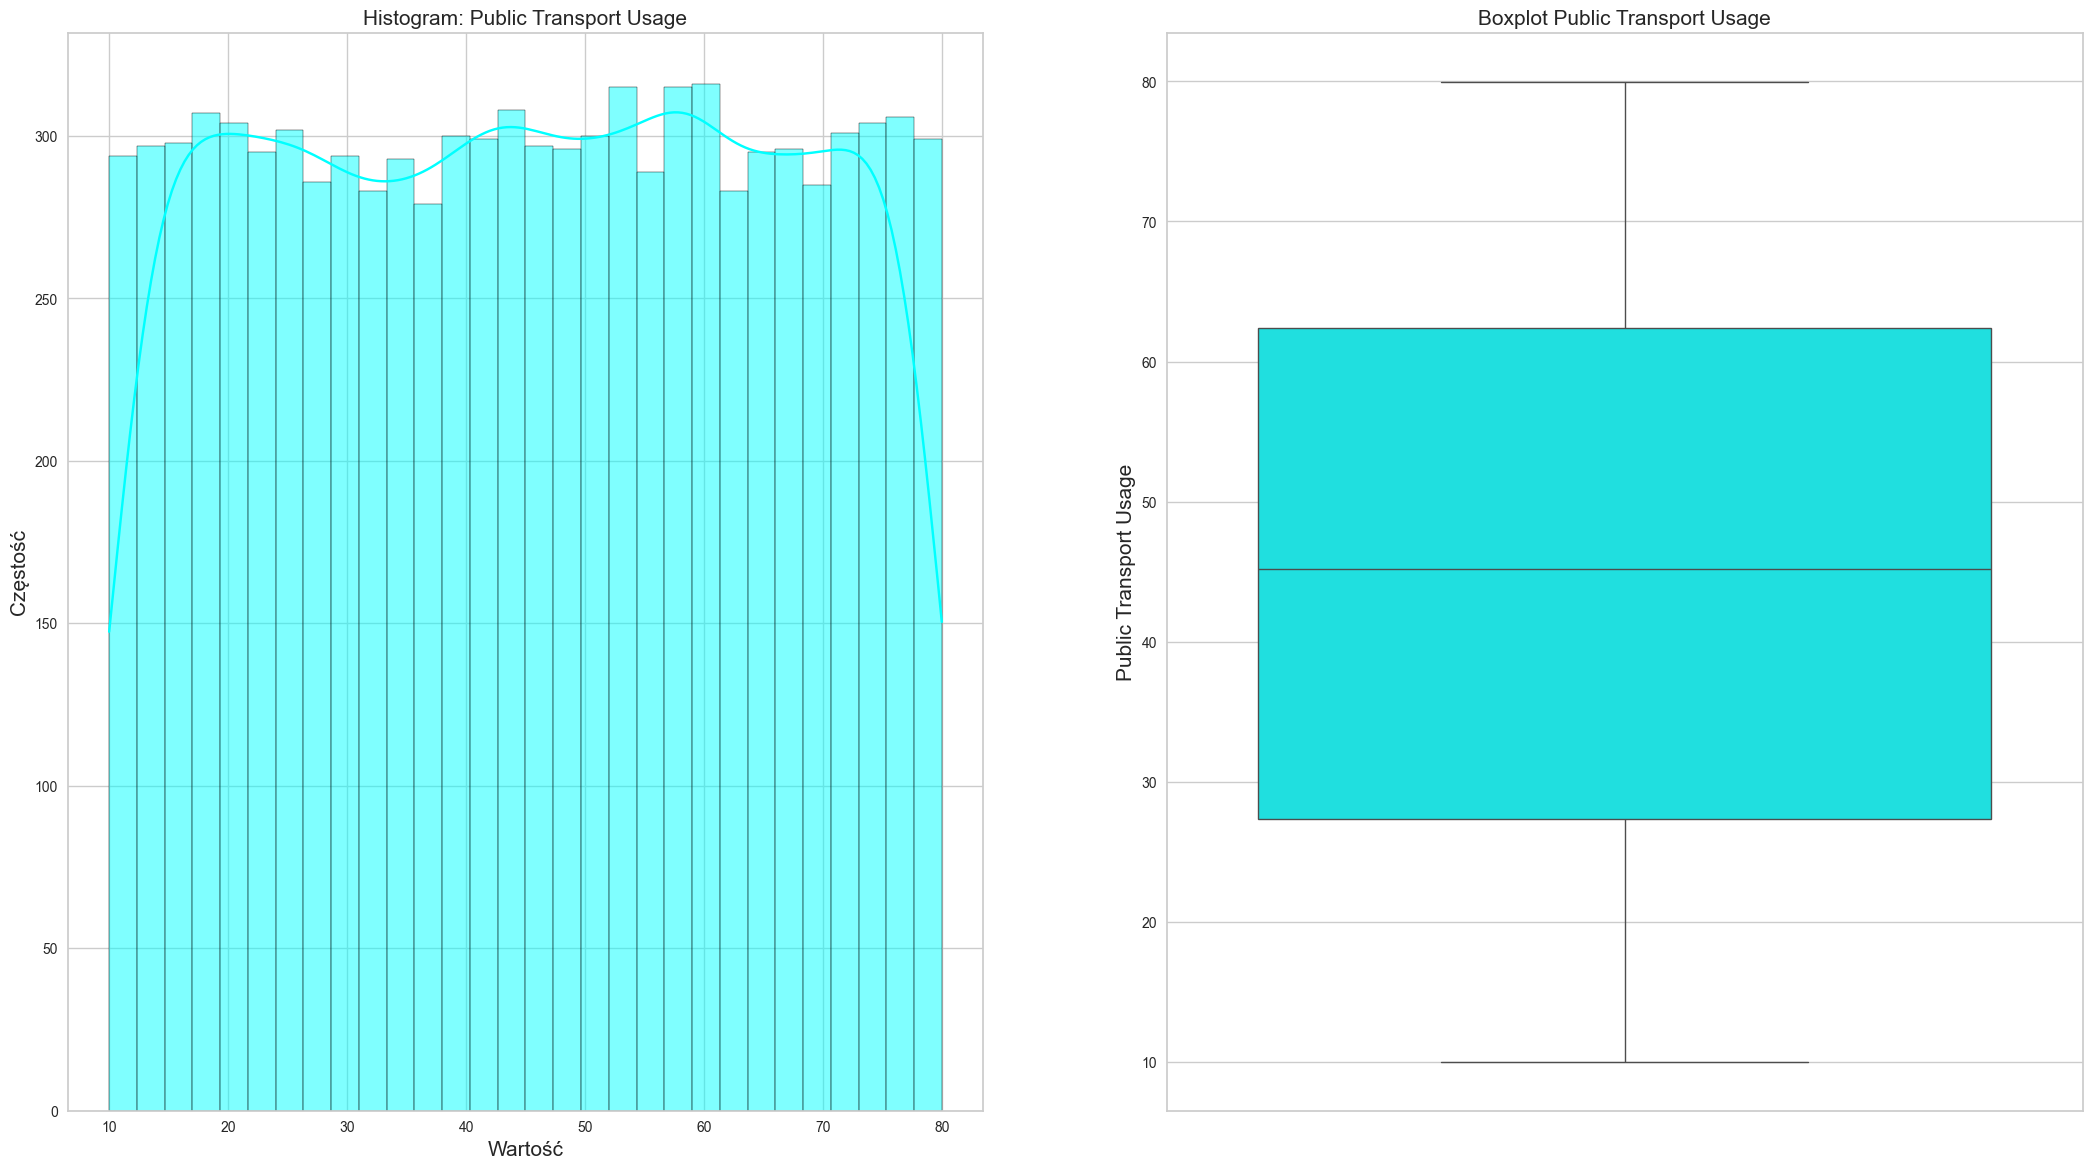

In [447]:
plt.figure(figsize=(26,14))

plt.subplot(121)
sns.histplot(df["Public Transport Usage"], kde=True, color="cyan", bins=30)
plt.title(f"Histogram: Public Transport Usage", fontsize=15)
plt.xlabel("Wartość", fontsize=15)
plt.ylabel("Częstość", fontsize=15)


plt.subplot(122)
sns.boxplot(data=df.iloc[:,10], color="cyan")
plt.title("Boxplot Public Transport Usage",fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.ylabel("Public Transport Usage", fontsize=15)
plt.show()

### Histogram:
- Histogram ukazuje dane równomiernie rozłożone w przedziale od około 10 do 80.
- Skośność wynosi -0.0099, co wskazuje na niemal idealną symetrię danych.
- Średnia (45.0867) a mediana (45.1707): Są one niemal identyczne, co dodatkowo potwierdza symetryczność rozkładu.
- Kurtoza (-1.199): Wskazuje na "spłaszczony" rozkład w porównaniu do rozkładu normalnego. Brak jest wyraźnych szczytów.
- Odchylenie standardowe wynosi 20.2085, a wariancja 408.3819, co świadczy o umiarkowanym zróżnicowaniu danych.
---
### Boxplot:
- Zakres danych: Dane mieszczą się w przedziale od 10.0069 (minimum) do 79.9797 (maksimum).
- Brak wartości odstających: Wartości skrajne na wykresie mieszczą się w naturalnych granicach zmienności.
- Rozstęp międzykwartylowy (IQR): Dane w głównej mierze są skoncentrowane między kwartylami, co wskazuje na stabilność rozkładu w środkowym zakresie.

# *Wartości dla Parking Usage* :

In [556]:
print('Wartość średnia: %.4f' %df.iloc[:,12].mean())
print("Wartość maksymalna : %.4f" %df.iloc[:,12].max())
print("Wartość minimalna: %.4f" %df.iloc[:,12].min())
print("Odchylenie standardowe %.4f" %df.iloc[:,12].std())
print('Wariancja: %.4f' %df.iloc[:,12].var())
print('Skośność: %.4f' %st.skew(df.iloc[:,12]))
print('Kurtoza: %.3f' %st.kurtosis(df.iloc[:,12]))
print('Kwantyl rzędu 0.25: %.4f' %np.quantile(df.iloc[:,12], q=0.25))
print('Kwantyl rzędu 0.5: %.4f' %np.quantile(df.iloc[:,12], q=0.5))
print('Kwantyl rzędu 0.75: %.4f' %np.quantile(df.iloc[:,12], q=0.75))

Wartość średnia: 75.1556
Wartość maksymalna : 99.9950
Wartość minimalna: 50.0204
Odchylenie standardowe 14.4094
Wariancja: 207.6306
Skośność: -0.0217
Kurtoza: -1.200
Kwantyl rzędu 0.25: 62.5459
Kwantyl rzędu 0.5: 75.3176
Kwantyl rzędu 0.75: 87.5186


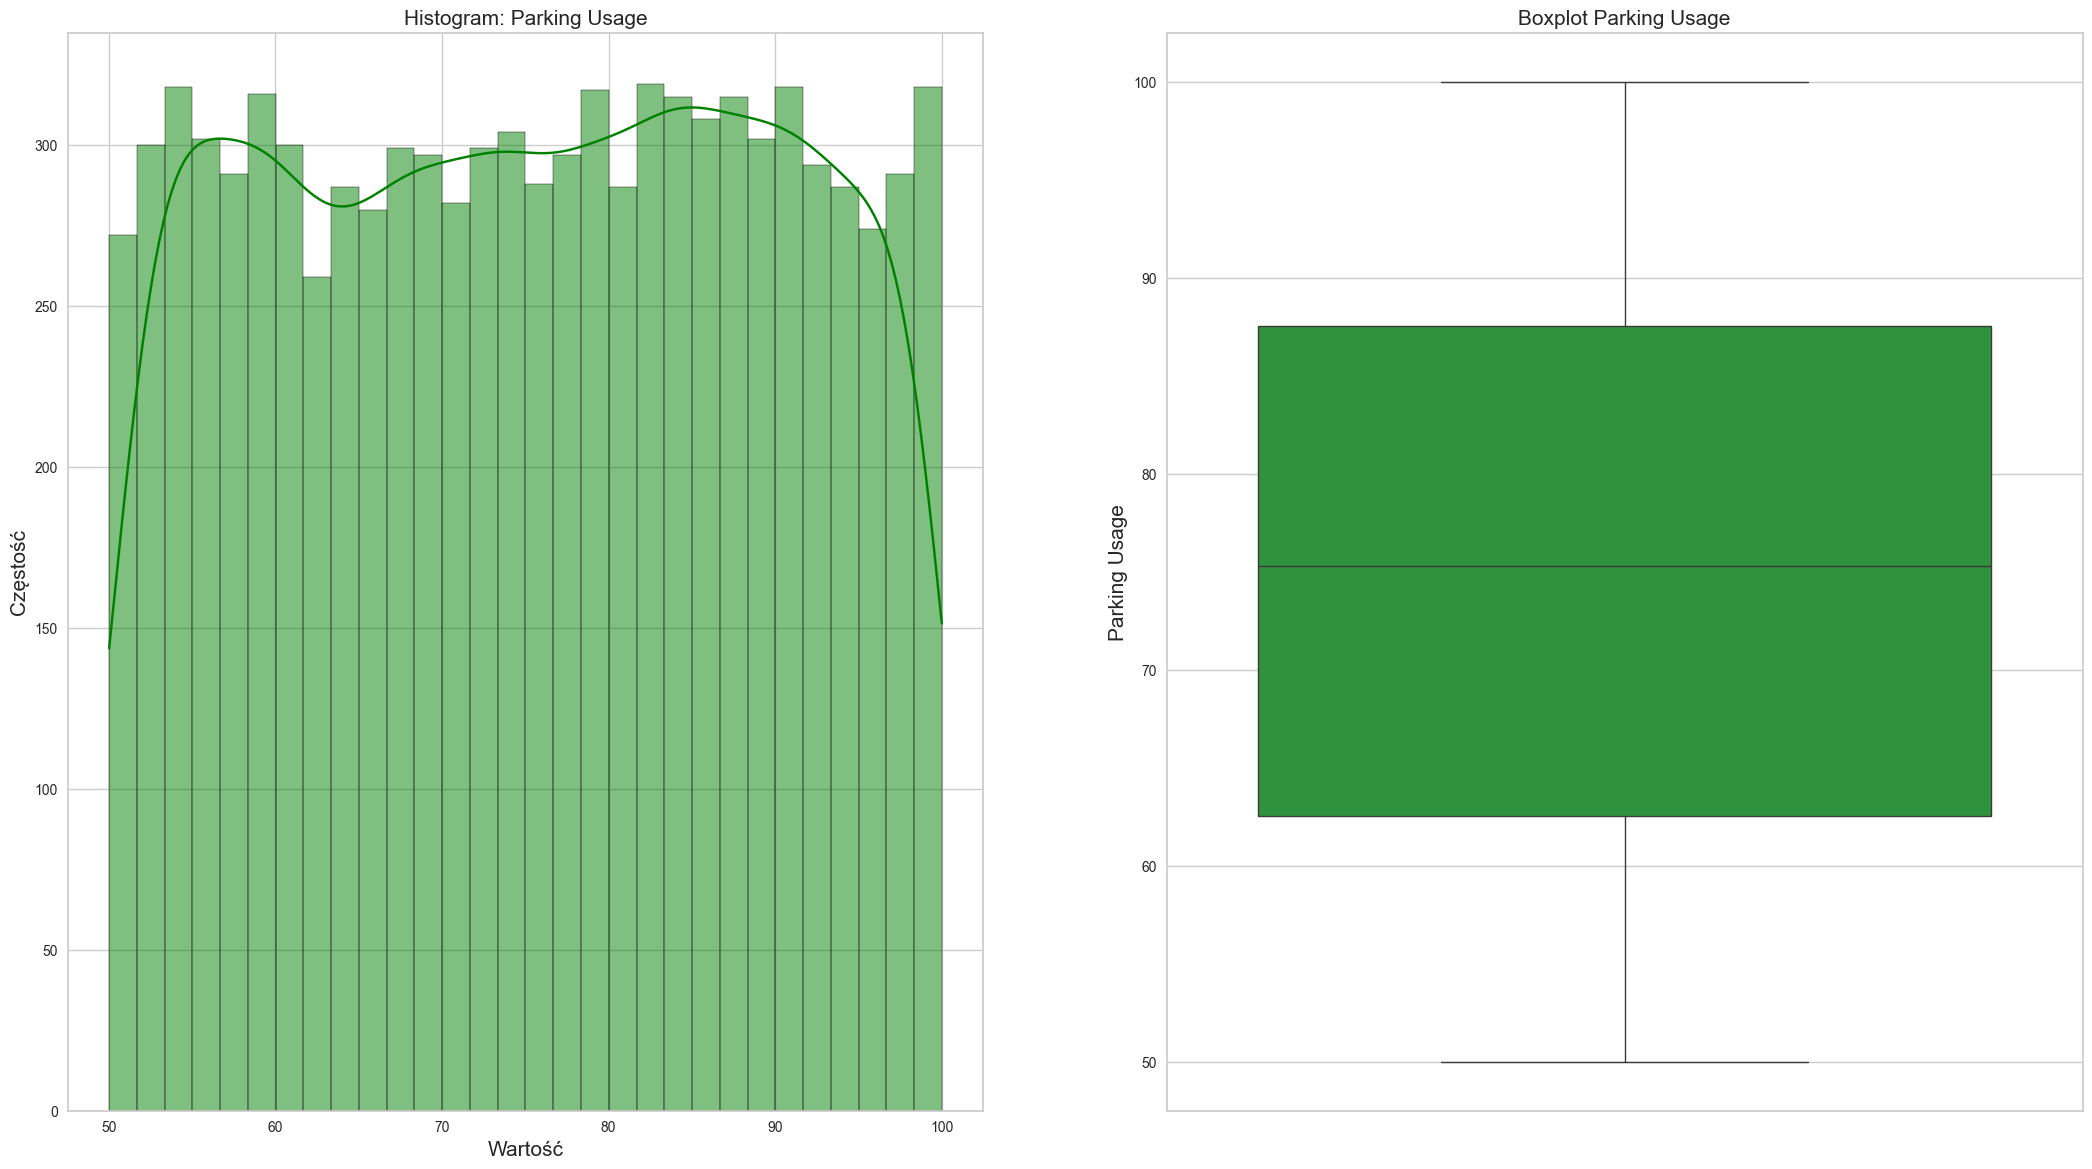

In [449]:
plt.figure(figsize=(26,14))

plt.subplot(121)
sns.histplot(df["Parking Usage"], kde=True, color="green", bins=30)
plt.title(f"Histogram: Parking Usage", fontsize=15)
plt.xlabel("Wartość", fontsize=15)
plt.ylabel("Częstość", fontsize=15)


plt.subplot(122)
sns.boxplot(data=df.iloc[:,12], color="#1ea231")
plt.title("Boxplot Parking Usage",fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.ylabel("Parking Usage", fontsize=15)
plt.show()

### Histogram:
- Histogram przedstawia równomierne rozłożenie wartości w przedziale od około 50 do 100, bez wyraźnych szczytów czy znaczących anomalii.
- Skośność wynosi -0.0217, co wskazuje na prawie idealną symetrię danych.
- Średnia (75.1556) a mediana (75.3176): Są one niemal identyczne, co potwierdza symetrię rozkładu.
- Kurtoza (-1.200): Oznacza spłaszczony rozkład w porównaniu do rozkładu normalnego, bez dominujących wartości.
- Odchylenie standardowe wynosi 14.4094, a wariancja 207.6306, co świadczy o umiarkowanym zróżnicowaniu danych.

---

### Boxplot:
- Dane mieszczą się w przedziale od 50.0204 (minimum) do 99.9950 (maksimum).
- Rozkład wartości jest spójny, a dane końcowe mieszczą się w naturalnym zakresie zmienności.
- Rozstęp międzykwartylowy (IQR): Dane w głównej mierze są skoncentrowane w przedziale od 62.5459 do 87.5186, co wskazuje na stabilność rozkładu w środkowym zakresie.

# *Wartości dla Pedestrian and Cyclist Count* :

In [450]:
print('Wartość średnia: %.4f' %df.iloc[:,13].mean())
print("Wartość maksymalna : %.4f" %df.iloc[:,13].max())
print("Wartość minimalna: %.4f" %df.iloc[:,13].min())
print("Odchylenie standardowe %.4f" %df.iloc[:,13].std())
print('Wariancja: %.4f' %df.iloc[:,13].var())
print('Skośność: %.4f' %st.skew(df.iloc[:,13]))
print('Kurtoza: %.3f' %st.kurtosis(df.iloc[:,13]))
print('Kwantyl rzędu 0.25: %.4f' %np.quantile(df.iloc[:,13], q=0.25))
print('Kwantyl rzędu 0.5: %.4f' %np.quantile(df.iloc[:,13], q=0.5))
print('Kwantyl rzędu 0.75: %.4f' %np.quantile(df.iloc[:,13], q=0.75))

Wartość średnia: 114.5333
Wartość maksymalna : 243.0000
Wartość minimalna: 66.0000
Odchylenie standardowe 36.8126
Wariancja: 1355.1655
Skośność: 1.8269
Kurtoza: 1.935
Kwantyl rzędu 0.25: 94.0000
Kwantyl rzędu 0.5: 102.0000
Kwantyl rzędu 0.75: 111.0000


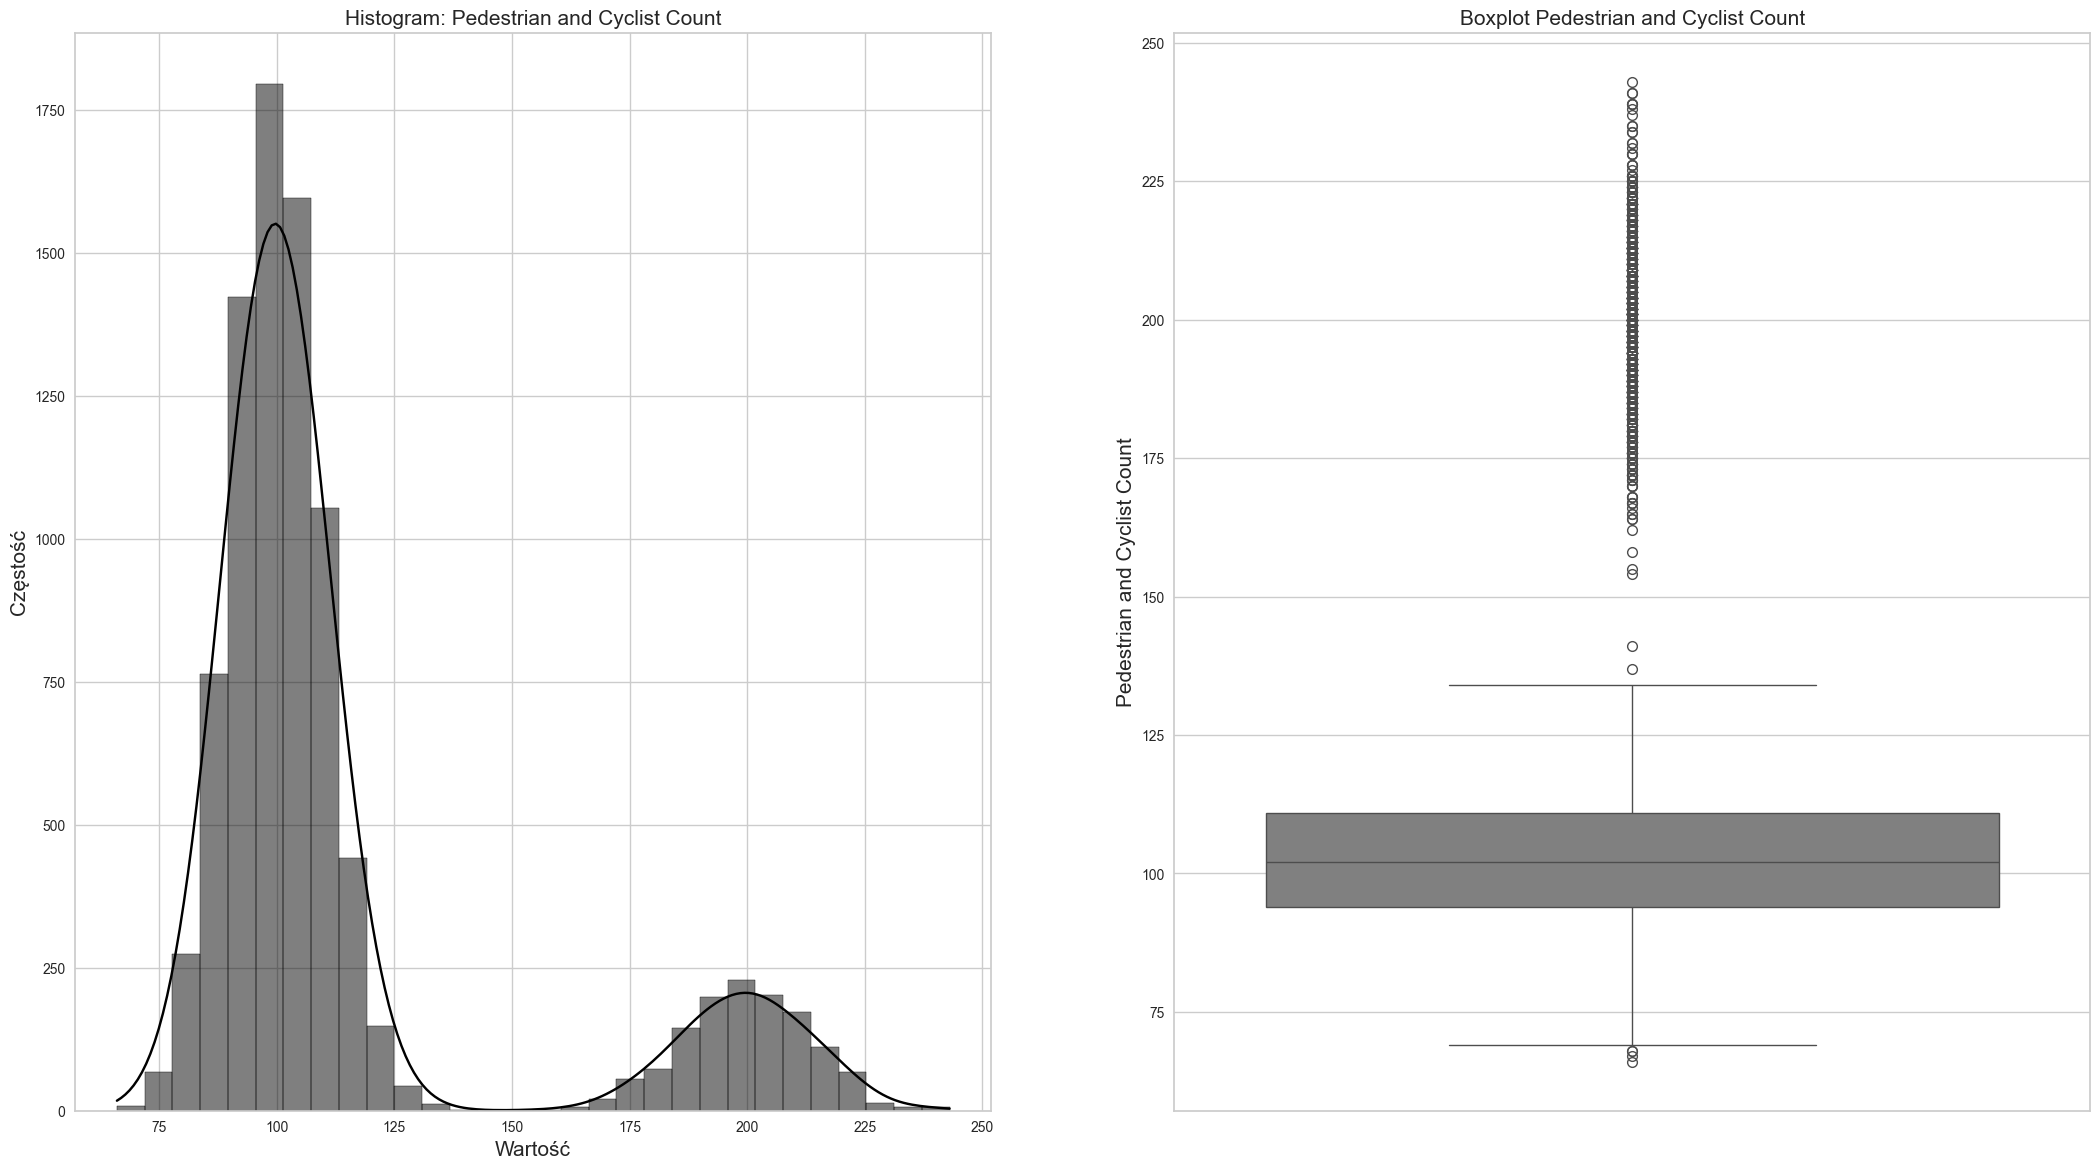

In [451]:
plt.figure(figsize=(26,14))

plt.subplot(121)
sns.histplot(df["Pedestrian and Cyclist Count"], kde=True, color="black", bins=30)
plt.title(f"Histogram: Pedestrian and Cyclist Count", fontsize=15)
plt.xlabel("Wartość", fontsize=15)
plt.ylabel("Częstość", fontsize=15)


plt.subplot(122)
sns.boxplot(data=df.iloc[:,13], color="gray")
plt.title("Boxplot Pedestrian and Cyclist Count",fontsize=15)
plt.xticks(rotation=45, fontsize=15)
plt.ylabel("Pedestrian and Cyclist Count", fontsize=15)
plt.show()

### Histogram:

- Histogram ujawnia rozkład wielomodalny, z głównym skupiskiem wartości w przedziale około 75-125 oraz mniejszym skupiskiem w okolicach 175-225.  
- Prawostronna skośność (1.8269) wskazuje, że większość danych skupia się przy niższych wartościach, a ogon rozkładu ciągnie się w kierunku wyższych wartości. 
- Wariancja (1355.1655) i odchylenie standardowe (36.8126) wskazują na stosunkowo duże zróżnicowanie danych.
- Wielomodalność sugeruje istnienie dwóch grup w danych lub różne schematy ruchu pieszych i rowerzystów w różnych warunkach (np. godziny szczytu vs. poza szczytem).

---

### Boxplot:

- Główna część danych (50%) mieści się między pierwszym (94.0000) a trzecim kwartylem (111.0000), co wskazuje na stosunkowo wąski środkowy zakres.  
- Wysoka liczba wartości odstających po stronie wyższych wartości (powyżej 175) jest charakterystyczna dla prawostronnej skośności.
- Minimalna wartość wynosi 66.0000, a maksymalna 243.0000, co sugeruje znaczną rozpiętość danych.

## Wykres rozrzutu 

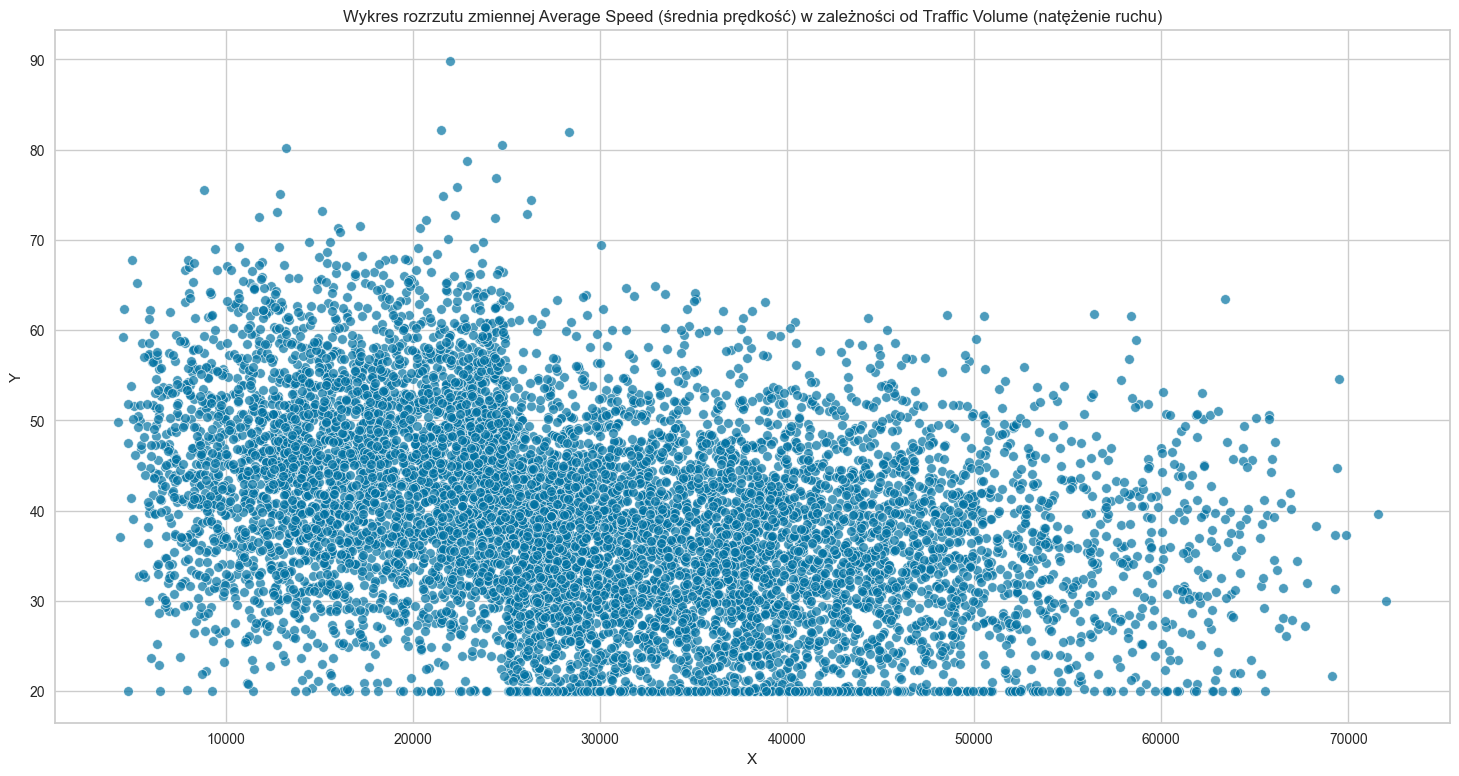

In [557]:
df_licz = df.select_dtypes(include=["number"])
plt.figure(figsize=(18, 9))
sns.scatterplot(data=df_licz, x="Traffic Volume", y="Average Speed", alpha=0.7)
plt.title("Wykres rozrzutu zmiennej Average Speed (średnia prędkość) w zależności od Traffic Volume (natężenie ruchu)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

#### Ogólny trend:

- W miarę wzrostu natężenia ruchu, średnia prędkość wydaje się mieć tendencję spadkową, co sugeruje, że większy ruch wiąże się z niższą średnią prędkością pojazdów.
- Przy niskim natężeniu ruchu (po lewej stronie wykresu) średnia prędkość jest bardziej zróżnicowana, ale przeważają wyższe wartości.

Przy dużym natężeniu ruchu średnia prędkość jest niższa, co może być skutkiem zatorów drogowych lub innych ograniczeń. Przy wyższych natężeniach ruchu górne wartości prędkości są ograniczone (np. brak punktów powyżej 60 km/h). 

## 3\) Obsługa braków danych

In [558]:
print("Ilość brakujących wartości w zbiorze: ")
print(df.isnull().sum())

Ilość brakujących wartości w zbiorze: 
Date                                  0
Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
dtype: int64


Omawiany zbiór danych jest kompletny (nie ma braków danych), zatem ten punkt pomijamy.

## 4\) Wstępne uczenie modelu

In [559]:
dane=pd.concat([df_licz, df.iloc[:, [14,15]]], axis=1)
dane.iloc[:,0:7].head()

,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact
0,50590,50.230299,1.500000,100.000000,100.000000,0,151.180
1,30825,29.377125,1.500000,100.000000,100.000000,1,111.650
2,7399,54.474398,1.039069,28.347994,36.396525,0,64.798
3,60874,43.817610,1.500000,100.000000,100.000000,1,171.748
4,57292,41.116763,1.500000,100.000000,100.000000,3,164.584


In [560]:
dane.iloc[:,7:].head()

,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,70.632330,84.044600,85.403629,111,Clear,No
1,41.924899,91.407038,59.983689,100,Clear,No
2,44.662384,61.375541,95.466020,189,Clear,No
3,32.773123,75.547092,63.567452,111,Clear,No
4,35.092601,64.634762,93.155171,104,Clear,No


In [561]:
exp_clf_hep = setup(data = dane,
                     target = 'Roadwork and Construction Activity',
                       session_id = 123, normalize=True, categorical_features=['Weather Conditions']) #bierzemy zmienne numeryczne potem, mamy weather conditions i road work (Yes, No)

,Description,Value
0,Session id,123
1,Target,Roadwork and Construction Activity
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(8936, 13)"
5,Transformed data shape,"(8936, 17)"
6,Transformed train set shape,"(6255, 17)"
7,Transformed test set shape,"(2681, 17)"
8,Numeric features,11
9,Categorical features,1


In [562]:
c1=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9014,0.4923,0.9014,0.8124,0.8546,0.0000,0.0000,0.5970
svm,SVM - Linear Kernel,0.9014,0.5033,0.9014,0.8124,0.8546,0.0000,0.0000,0.0400
ridge,Ridge Classifier,0.9014,0.4925,0.9014,0.8124,0.8546,0.0000,0.0000,0.0460
lda,Linear Discriminant Analysis,0.9014,0.4925,0.9014,0.8124,0.8546,0.0000,0.0000,0.0450
dummy,Dummy Classifier,0.9014,0.5000,0.9014,0.8124,0.8546,0.0000,0.0000,0.0290
rf,Random Forest Classifier,0.9012,0.5042,0.9012,0.8124,0.8545,-0.0003,-0.0013,0.4010
nb,Naive Bayes,0.9010,0.4781,0.9010,0.8124,0.8544,-0.0006,-0.0027,0.0360
et,Extra Trees Classifier,0.9009,0.5018,0.9009,0.8124,0.8544,-0.0009,-0.0040,0.1770
ada,Ada Boost Classifier,0.9006,0.4955,0.9006,0.8224,0.8545,0.0010,0.0066,0.1430
gbc,Gradient Boosting Classifier,0.9002,0.4942,0.9002,0.8200,0.8546,0.0028,0.0050,0.4860


### Najlepsze modele pod względem dokładności (Accuracy):

- Logistic Regression (lr), SVM (svm), Ridge Classifier (ridge), Linear Discriminant Analysis (lda), i Dummy Classifier mają tę samą dokładność na poziomie **0.9014**.
- Wszystkie te modele radzą sobie równie dobrze, jeśli chodzi o przewidywanie klasy docelowej.


### AUC:

AUC to miara zdolności modelu do rozróżniania klas. Najwyższy wynik AUC osiągnął K Neighbors Classifier (knn) **(0.5101)** oraz Random Forest (rf) **(0.5042)**. Modele o wyższym AUC lepiej klasyfikują obserwacje jako "Yes" lub "No".

### Precision:

Najwieksza precyzja jest dla metody knn i wynosi około **	0.8262**, co oznacza, że **82.62%** przewidywań "Yes" jest prawidłowych.

## 5\) Analiza wartości odstających (outliers) za pomocą IQR

In [458]:
def __get_mask_iqr(data):
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr_c = (q3 - q1) * 1.5
  lower = q1 - iqr_c
  upper = q3 + iqr_c

  return (data < lower) | (data > upper)

def __get_mask_dev(data):
  return np.abs((data - data.mean()) / (data.std() + np.spacing(data.std()))) > 3

def get_detection_method(name):
  if name == 'iqr':
    return __get_mask_iqr
  elif name == 'dev':
    return __get_mask_dev
  else:
    raise Exception('Unknown detection method')

def get_outliers(df, detection_method, columns=None):
  if columns is None:
    columns = df.columns
  res = []
  for col in columns:
    res.append(detection_method(df[col]))
  return np.array(res).T




#print(get_outliers(df_licz, get_detection_method('iqr')))
#print(get_outliers(df_licz, get_detection_method('dev')))


# out_mask = get_outliers(df, get_detection_method('iqr'))
out_mask = get_outliers(df_licz, get_detection_method('dev'))
#print(out_mask)
#print(out_mask.shape)

final = out_mask.any(axis=1)

#print(final.shape)
#print(final.sum())

In [563]:
df_licz1=pd.concat([df_licz, df.iloc[:, 15]], axis=1)
df_licz1=df_licz1.dropna() # wszystkie zmienne bez usunietych outlierow ze zmienna kategoryczna
df_clean1 = df_licz1[~final]
df_clean = df_licz[~final]
# XXX: Delete
#print(df_clean.shape) # wszystkie zmienne liczbowe z usunietrymi wierszami

#print(df_clean.shape[0] / df_licz.shape[0] * 100, '%'," zostało ze zbioru danych wejściowych po usunięciu outlierów ")

In [564]:
df_clean.to_csv("outliery.csv",sep=";", index=False)
df_clean.head()
df_clean1111=pd.concat([df_clean,df.iloc[:,14] ,df.iloc[:, 15]], axis=1)
df_clean1111=df_clean1111.dropna()


<div style="page-break-before: always;"></div>

### Uczenie modelu po usunieciu outlierow

In [565]:
exp_clf_hep = setup(data = df_clean1111,
                     target = 'Roadwork and Construction Activity',
                       session_id = 123, normalize=True, categorical_features=['Weather Conditions']) #bierzemy zmienne numeryczne potem, mamy weather conditions i road work (Yes, No)

,Description,Value
0,Session id,123
1,Target,Roadwork and Construction Activity
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(8529, 13)"
5,Transformed data shape,"(8529, 17)"
6,Transformed train set shape,"(5970, 17)"
7,Transformed test set shape,"(2559, 17)"
8,Numeric features,11
9,Categorical features,1


In [566]:
c2=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9013,0.5040,0.9013,0.8124,0.8546,0.0000,0.0000,0.0520
svm,SVM - Linear Kernel,0.9013,0.4956,0.9013,0.8124,0.8546,0.0000,0.0000,0.0320
ridge,Ridge Classifier,0.9013,0.5030,0.9013,0.8124,0.8546,0.0000,0.0000,0.0420
lda,Linear Discriminant Analysis,0.9013,0.5030,0.9013,0.8124,0.8546,0.0000,0.0000,0.0450
dummy,Dummy Classifier,0.9013,0.5000,0.9013,0.8124,0.8546,0.0000,0.0000,0.0400
rf,Random Forest Classifier,0.9012,0.5044,0.9012,0.8124,0.8545,-0.0003,-0.0014,0.4320
et,Extra Trees Classifier,0.9010,0.5133,0.9010,0.8124,0.8544,-0.0007,-0.0027,0.2010
ada,Ada Boost Classifier,0.9008,0.4865,0.9008,0.8124,0.8543,-0.0010,-0.0041,0.1760
gbc,Gradient Boosting Classifier,0.8997,0.4891,0.8997,0.8123,0.8537,-0.0033,-0.0102,0.4680
lightgbm,Light Gradient Boosting Machine,0.8995,0.5089,0.8995,0.8223,0.8540,-0.0009,0.0002,0.4820


### Modele pod względem dokładności po usunięciu outlierów (Accuracy):

- Większość modeli nie wykazała istotnych zmian w dokładności, różnice są bliskie zera (zmiana w granicach ±0.0001).
- Wyjątek stanowi kilka modeli, gdzie dokładność zmniejszyła się minimalnie, ale są to zmiany na poziomie ułamków procenta.


### AUC:

- Większość modeli wykazała nieznaczne różnice w AUC, ale zmiany są niewielkie.

### Wnioski:

Usunięcie wartości odstających nie miało znaczącego wpływu na dokładność ani na AUC w większości modeli. Jednakże modele takie jak Extra Trees Classifier zyskały nieco na AUC, co może świadczyć o lepszym dopasowaniu w kontekście danych testowych.

# 5.	Usuwanie kolumn o małej wariancji

In [463]:
threshold = 0.01 
variances = df_clean.var()
df_filtered = df_clean.loc[:, variances > threshold]
print(variances)
print(f"\nKolumny przed usunięciem: {df_clean.shape[1]}")
print(f"\nKolumny po usunięciu o małej wariancji: {df_filtered.shape[1]}")

Traffic Volume                  1.571518e+08
Average Speed                   1.113542e+02
Travel Time Index               2.674299e-02
Congestion Level                4.676086e+02
Road Capacity Utilization       1.815584e+02
Incident Reports                1.778066e+00
Environmental Impact            6.286072e+02
Public Transport Usage          4.083123e+02
Traffic Signal Compliance       1.338896e+02
Parking Usage                   2.078186e+02
Pedestrian and Cyclist Count    1.139844e+03
dtype: float64

Kolumny przed usunięciem: 11

Kolumny po usunięciu o małej wariancji: 11


Zatem nie usuwamy żadnej kolumny. Żadna z nich nie ma dostatecznie niskiej wariancji.

<div style="page-break-before: always;"></div>

# Wyznaczenie korelacji dla wszystkich cech i usunięcie cech o wysokiej korelacji

In [464]:
correlation_matrix = df_clean.corr()

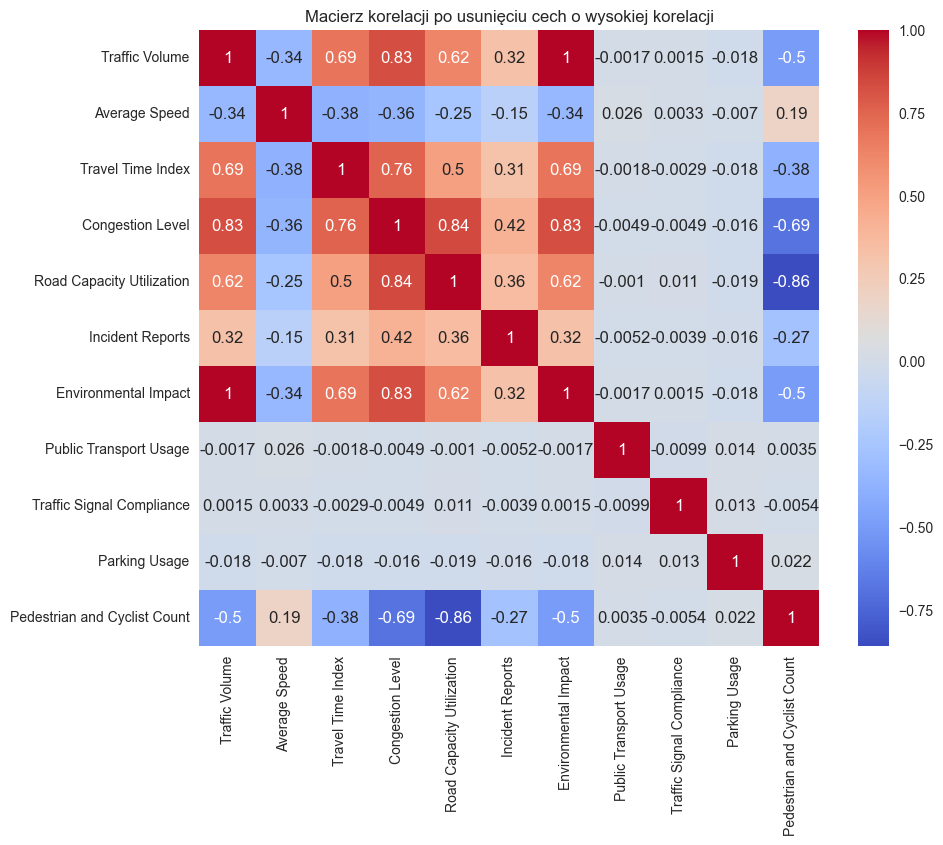

In [465]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Macierz korelacji po usunięciu cech o wysokiej korelacji")
plt.show()

In [466]:
correlation_threshold = 0.9
high_correlation_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            col_name = correlation_matrix.columns[i]
            high_correlation_columns.add(col_name)

df_reduced = df_clean.drop(columns=high_correlation_columns)

print(f"Usunięto {len(high_correlation_columns)} kolumn o wysokiej korelacji.")
print("Pozostałe kolumny:")
print(df_reduced.columns)
print(df_reduced.shape)

Usunięto 1 kolumn o wysokiej korelacji.
Pozostałe kolumny:
Index(['Traffic Volume', 'Average Speed', 'Travel Time Index',
       'Congestion Level', 'Road Capacity Utilization', 'Incident Reports',
       'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count'],
      dtype='object')
(8529, 10)


Zatem usunięta została kolumna Environmental Impact, ponieważ była ona skorelowana ze zmienną Traffic Volume na poziomie równym 1. Oznacza to, że były one liniowo zależne, dlatego pozbywamy się jednej z nich.

<div style="page-break-before: always;"></div>

# Usunięcie anomalii

### Usuwamy anomalie ze zbioru zmodyfikowanego - po usunięciu kolumny `Environmental Impact`

``` python
df_reduced1=pd.concat([df_reduced,df.iloc[:,14] ,df.iloc[:, 15]], axis=1) 
df_reduced1=df_reduced1.dropna()
print("Kształt zbioru danych:", df_reduced1.shape)
df_reduced1.head()

In [467]:
df_reduced1=pd.concat([df_reduced,df.iloc[:,14] ,df.iloc[:, 15]], axis=1) # to jest zbior zmiennych numerycznych, a takze zmeinnej kategorycznej Weather Conditions po usunieciu kolumny enviormental impact ze zmienna kategoryczna ktora klasyfikujemy
df_reduced1=df_reduced1.dropna() # byla ona liniowo zalezna od zmiennej traffic volume
print("Kształt zbioru danych:", df_reduced1.shape)
df_reduced1.iloc[:,0:7].head()

Kształt zbioru danych: (8529, 12)


,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Public Transport Usage
0,50590.0,50.230299,1.5,100.0,100.0,0.0,70.632330
1,30825.0,29.377125,1.5,100.0,100.0,1.0,41.924899
3,60874.0,43.817610,1.5,100.0,100.0,1.0,32.773123
4,57292.0,41.116763,1.5,100.0,100.0,3.0,35.092601
5,47848.0,34.241963,1.5,100.0,100.0,3.0,39.927871


In [468]:
df_reduced1.iloc[:,7:].head()

,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,84.044600,85.403629,111.0,Clear,No
1,91.407038,59.983689,100.0,Clear,No
3,75.547092,63.567452,111.0,Clear,No
4,64.634762,93.155171,104.0,Clear,No
5,61.016765,55.394571,94.0,Overcast,No


<div style="page-break-before: always;"></div>

#### **Klasyfikacja przed usunięciem anomalii:**

In [469]:
clf_setup = setup(data=df_reduced1, target='Roadwork and Construction Activity', session_id=123, normalize=True)
best_model_before = compare_models()

,Description,Value
0,Session id,123
1,Target,Roadwork and Construction Activity
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(8529, 12)"
5,Transformed data shape,"(8529, 16)"
6,Transformed train set shape,"(5970, 16)"
7,Transformed test set shape,"(2559, 16)"
8,Numeric features,10
9,Categorical features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9013,0.5044,0.9013,0.8124,0.8546,0.0000,0.0000,0.0310
svm,SVM - Linear Kernel,0.9013,0.4782,0.9013,0.8124,0.8546,0.0000,0.0000,0.0300
ridge,Ridge Classifier,0.9013,0.5030,0.9013,0.8124,0.8546,0.0000,0.0000,0.0340
lda,Linear Discriminant Analysis,0.9013,0.5030,0.9013,0.8124,0.8546,0.0000,0.0000,0.0300
dummy,Dummy Classifier,0.9013,0.5000,0.9013,0.8124,0.8546,0.0000,0.0000,0.0230
rf,Random Forest Classifier,0.9012,0.5259,0.9012,0.8124,0.8545,-0.0003,-0.0014,0.3200
et,Extra Trees Classifier,0.9012,0.5221,0.9012,0.8124,0.8545,-0.0003,-0.0014,0.1730
ada,Ada Boost Classifier,0.9008,0.4865,0.9008,0.8124,0.8543,-0.0010,-0.0041,0.1300
gbc,Gradient Boosting Classifier,0.9000,0.4852,0.9000,0.8123,0.8539,-0.0026,-0.0093,0.4230
lightgbm,Light Gradient Boosting Machine,0.8995,0.5089,0.8995,0.8223,0.8540,-0.0009,0.0002,0.1710


### Porównanie dokładności (Accuracy) i AUC po usunięciu kolumny ze zmienną liniowo zależną:

#### Accuracy:
- Różnice w dokładności pomiędzy obecnym modelem a modelem po usunięciu wartości odstających są **praktycznie zerowe** dla większości modeli.
- **Żadne znaczące zmiany** w dokładności nie zostały odnotowane.

#### AUC:
- **Random Forest Classifier**: Wzrost AUC o **+0.0215**, co wskazuje na lepsze rozróżnianie między klasami.
- **Extra Trees Classifier**: Wzrost AUC o **+0.0188**, co również oznacza poprawę w zdolności rozróżniania klas.
- Pozostałe modele wykazują jedynie minimalne zmiany w wartościach AUC.
### Wniosek:
- **Usunięcie kolumny liniowo zależnej** miało niewielki wpływ na dokładność predykcji.
- **Poprawa w AUC** wskazuje, że niektóre modele, zwłaszcza Random Forest Classifier i Extra Trees Classifier, lepiej rozróżniają klasy po usunięciu tej kolumny.


<div style="page-break-before: always;"></div>

``` python 
# Wykrywanie anomalii z użyciem Isolation Forest
anomaly_setup = setup(data=df_reduced1, normalize=True,session_id=123)
iforest = create_model("iforest")
iforest_results = assign_model(iforest)

In [470]:
from pycaret.anomaly import *
# 3. Wykrywanie anomalii z użyciem Isolation Forest
anomaly_setup = setup(data=df_reduced1, normalize=True,session_id=123)
iforest = create_model("iforest")
iforest_results = assign_model(iforest)

,Description,Value
0,Session id,123
1,Original data shape,"(8529, 12)"
2,Transformed data shape,"(8529, 16)"
3,Numeric features,10
4,Categorical features,2
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


``` python
# Usuwanie anomalii
dane4 = pd.DataFrame(iforest_results)
print(f"Kształt przed usunięciem anomalii: {df_reduced1.shape}")
dane4 = dane4[dane4['Anomaly'] != 1] 
dane4 = dane4.reset_index(drop=True)
df_reduced2 = dane4.iloc[:, :-2]  # Usunięcie kolumn `Anomaly` i `Anomaly_Score`

print(f"Kształt po usunięciu anomalii: {df_reduced2.shape}")
print(f"Liczba usuniętych wierszy: {iforest_results.shape[0] - df_reduced2.shape[0]}")

In [519]:
# Usuwanie anomalii
dane4 = pd.DataFrame(iforest_results)
print(f"Kształt przed usunięciem anomalii: {df_reduced1.shape}")
dane4 = dane4[dane4['Anomaly'] != 1]  # Zachowanie tylko normalnych obserwacji
dane4 = dane4.reset_index(drop=True)
df_reduced2 = dane4.iloc[:, :-2]  # Usunięcie kolumn `Anomaly` i `Anomaly_Score`

print(f"Kształt po usunięciu anomalii: {df_reduced2.shape}")
print(f"Liczba usuniętych wierszy: {iforest_results.shape[0] - df_reduced2.shape[0]}")

Kształt przed usunięciem anomalii: (8529, 12)
Kształt po usunięciu anomalii: (8102, 12)
Liczba usuniętych wierszy: 427


``` python
# Klasyfikacja po usunięciu anomalii
clf_setup_after = setup(data=df_reduced2, target='Roadwork and Construction Activity', session_id=123, normalize=True)
best_model_after = compare_models()

In [472]:
# 4. Klasyfikacja po usunięciu anomalii
from pycaret.anomaly import *
from pycaret.classification import *
clf_setup_after = setup(data=df_reduced2, target='Roadwork and Construction Activity', session_id=123
, normalize=True)
best_model_after = compare_models()

,Description,Value
0,Session id,123
1,Target,Roadwork and Construction Activity
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(8102, 12)"
5,Transformed data shape,"(8102, 16)"
6,Transformed train set shape,"(5671, 16)"
7,Transformed test set shape,"(2431, 16)"
8,Numeric features,10
9,Categorical features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9145,0.5754,0.9145,0.8363,0.8736,0.0000,0.0000,0.0560
svm,SVM - Linear Kernel,0.9145,0.5453,0.9145,0.8363,0.8736,0.0000,0.0000,0.0480
ridge,Ridge Classifier,0.9145,0.5772,0.9145,0.8363,0.8736,0.0000,0.0000,0.0380
rf,Random Forest Classifier,0.9145,0.5331,0.9145,0.8363,0.8736,0.0000,0.0000,0.3390
ada,Ada Boost Classifier,0.9145,0.5550,0.9145,0.8450,0.8740,0.0033,0.0124,0.1460
lda,Linear Discriminant Analysis,0.9145,0.5773,0.9145,0.8363,0.8736,0.0000,0.0000,0.0290
dummy,Dummy Classifier,0.9145,0.5000,0.9145,0.8363,0.8736,0.0000,0.0000,0.0260
et,Extra Trees Classifier,0.9143,0.5486,0.9143,0.8363,0.8735,-0.0003,-0.0013,0.1620
lightgbm,Light Gradient Boosting Machine,0.9138,0.5616,0.9138,0.8448,0.8736,0.0020,0.0090,0.1990
gbc,Gradient Boosting Classifier,0.9131,0.5462,0.9131,0.8448,0.8733,0.0007,0.0046,0.4190


# Analiza wyników modeli przed i po usunięciu anomalii

## Ogólne obserwacje:
1. **Accuracy:**  
   Wszystkie modele, z wyjątkiem QDA i Decision Tree, mają bardzo zbliżoną lub identyczną dokładność na poziomie około **0.9145**. Wartości dla QDA i DT są znacznie niższe (**0.8531** dla QDA i **0.8314** dla DT).

2. **AUC:**  
   - **Najlepszy wynik AUC osiągnął model LightGBM** z wynikiem **0.5616**, co wskazuje na najlepszą zdolność do rozróżniania klas.  
   - Modele Logistic Regression, Ridge oraz Naive Bayes mają bardzo zbliżone wyniki AUC w przedziale **0.5754 – 0.5776**.  
   - Decision Tree i Dummy Classifier osiągają najniższe AUC (**0.5070 i 0.5000**), co sugeruje słabe rozróżnianie klas.

``` python
df_reduced2.to_csv("oczyszczony.csv",sep=";", index=False)

In [473]:
df_reduced2.to_csv("oczyszczony.csv",sep=";", index=False)

<div style="page-break-before: always;"></div>

# 6.	Uczenie modeli w celu wskazania najistotniejszych cech oraz rozszerzenie zbioru o nowe cechy i sprawdzenie wpływu tej operacji na skuteczność modeli.

## Wskazanie najistotniejszych cech w modelu.

### Wykorzystujemy zbiór danych powstały po operacjach z podpunktu 5.


In [474]:
## Używamy zbiór danych po operacjach w 5 podpunkcie, po usunięciu anomalii
#df_reduced2.head()

``` python 
clf_setup = setup(data=df_reduced2,
                  target='Roadwork and Construction Activity',
                  session_id=123,
                  normalize=True,
                  categorical_features=['Weather Conditions'])


In [475]:
clf_setup = setup(data=df_reduced2,
                  target='Roadwork and Construction Activity',
                  session_id=123,
                  normalize=True,
                  categorical_features=['Weather Conditions'])


,Description,Value
0,Session id,123
1,Target,Roadwork and Construction Activity
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(8102, 12)"
5,Transformed data shape,"(8102, 16)"
6,Transformed train set shape,"(5671, 16)"
7,Transformed test set shape,"(2431, 16)"
8,Numeric features,10
9,Categorical features,1


``` python
best_model = compare_models()

In [476]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9145,0.5754,0.9145,0.8363,0.8736,0.0000,0.0000,0.0390
svm,SVM - Linear Kernel,0.9145,0.5453,0.9145,0.8363,0.8736,0.0000,0.0000,0.0660
ridge,Ridge Classifier,0.9145,0.5772,0.9145,0.8363,0.8736,0.0000,0.0000,0.0440
rf,Random Forest Classifier,0.9145,0.5331,0.9145,0.8363,0.8736,0.0000,0.0000,0.3030
ada,Ada Boost Classifier,0.9145,0.5550,0.9145,0.8450,0.8740,0.0033,0.0124,0.1420
lda,Linear Discriminant Analysis,0.9145,0.5773,0.9145,0.8363,0.8736,0.0000,0.0000,0.0280
dummy,Dummy Classifier,0.9145,0.5000,0.9145,0.8363,0.8736,0.0000,0.0000,0.0250
et,Extra Trees Classifier,0.9143,0.5486,0.9143,0.8363,0.8735,-0.0003,-0.0013,0.1840
lightgbm,Light Gradient Boosting Machine,0.9138,0.5616,0.9138,0.8448,0.8736,0.0020,0.0090,0.2160
gbc,Gradient Boosting Classifier,0.9131,0.5462,0.9131,0.8448,0.8733,0.0007,0.0046,0.4920


<div style="page-break-before: always;"></div>

``` python
plot_model(best_model, plot='feature')

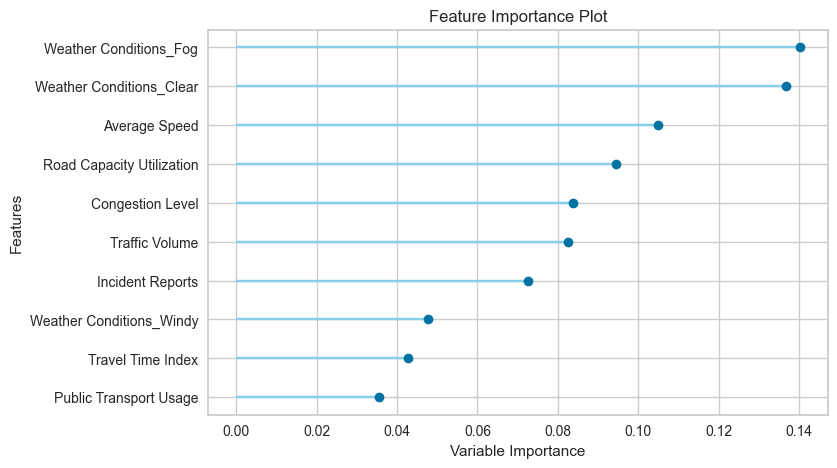

In [477]:
plot_model(best_model, plot='feature')

# Wykres Feature Importance Plot jest stworzony dla modelu `lr (logistic regression)`

**Najistotniejsze cechy w modelu:**  Weather Conditions_Fog, Weather Conditions_Clear , Average Speed, Road Capacity Utilization mają najwyższą wartość ważności. Są to cechy, które najbardziej wpływają na model.


**Mniej istotne cechy w modelu:** Congestion Level, Traffic Volume i  Incident Report mają niskie wartości ważności.

## Rozszerzenie zbioru o nowe cechy :

``` python
df_reduced2['Pedestrian_Cyclist_Congestion_Avg_Speed'] = df_reduced2['Pedestrian and Cyclist Count']* df_reduced2['Congestion Level'] * df_reduced2['Average Speed']
df_reduced2['Road_Capacity_Utilization_Overcast'] = df_reduced2['Road Capacity Utilization'] * (df_reduced2['Weather Conditions'] == 'Overcast')
df_reduced2['Incident_Reports_Congestion_Squared'] = df_reduced2['Incident Reports'] * df_reduced2['Congestion Level']**2
df_reduced2['Average Speed Squared'] = df_reduced2['Average Speed']**2

In [520]:
df_reduced2['Pedestrian_Cyclist_Congestion_Avg_Speed'] = df_reduced2['Pedestrian and Cyclist Count']* df_reduced2['Congestion Level'] * df_reduced2['Average Speed']
df_reduced2['Road_Capacity_Utilization_Overcast'] = df_reduced2['Road Capacity Utilization'] * (df_reduced2['Weather Conditions'] == 'Overcast')
df_reduced2['Incident_Reports_Congestion_Squared'] = df_reduced2['Incident Reports'] * df_reduced2['Congestion Level']**2
df_reduced2['Average Speed Squared'] = df_reduced2['Average Speed']**2

``` python
clf_setup_after1 = setup(data=df_reduced2, target='Roadwork and Construction Activity', session_id=123, normalize=True)
best_model_after1 = compare_models()

In [521]:
clf_setup_after1 = setup(data=df_reduced2, target='Roadwork and Construction Activity', session_id=123, normalize=True)
best_model_after1 = compare_models()

,Description,Value
0,Session id,123
1,Target,Roadwork and Construction Activity
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(8102, 16)"
5,Transformed data shape,"(8102, 20)"
6,Transformed train set shape,"(5671, 20)"
7,Transformed test set shape,"(2431, 20)"
8,Numeric features,14
9,Categorical features,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9145,0.5778,0.9145,0.8363,0.8736,0.0000,0.0000,0.0620
svm,SVM - Linear Kernel,0.9145,0.5255,0.9145,0.8363,0.8736,0.0000,0.0000,0.0440
ridge,Ridge Classifier,0.9145,0.5788,0.9145,0.8363,0.8736,0.0000,0.0000,0.0370
rf,Random Forest Classifier,0.9145,0.5210,0.9145,0.8363,0.8736,0.0000,0.0000,0.4530
lda,Linear Discriminant Analysis,0.9145,0.5787,0.9145,0.8363,0.8736,0.0000,0.0000,0.0340
et,Extra Trees Classifier,0.9145,0.5535,0.9145,0.8363,0.8736,0.0000,0.0000,0.1740
dummy,Dummy Classifier,0.9145,0.5000,0.9145,0.8363,0.8736,0.0000,0.0000,0.0390
ada,Ada Boost Classifier,0.9138,0.5507,0.9138,0.8362,0.8733,-0.0014,-0.0051,0.1640
lightgbm,Light Gradient Boosting Machine,0.9132,0.5529,0.9132,0.8435,0.8737,0.0042,0.0092,0.2260
gbc,Gradient Boosting Classifier,0.9129,0.5468,0.9129,0.8361,0.8728,-0.0031,-0.0093,0.5740


Po wielu próbach dodania nowo utworzonych zmiennych dokładność modelu nie poprawiła się.
Niewielką zmianę możemy zauważyć w AUC, gdzie po rozszerzeniu zbioru o nowe zmienne, AUC poprawiło się o 0.0034

``` python
df_reduced2.to_csv("zbiór rozszerzony.csv",sep=";", index=False)

In [483]:
df_reduced2.to_csv("zbiór rozszerzony.csv",sep=";", index=False)

<div style="page-break-before: always;"></div>

# 7.	Redukcja wymiarów w zbiorze danych metodą PCA oraz ICA dla zbiorów z podpunktu 3 i 4.

#### Metoda PCA 
Robimy ją dla danych z podpunktu 4 (zbiór, na którym zostało przeprowadzone wstępne uczenie modeli).
Zmienną kategoryczną `Weather Conditions` kodujemy jako one-hot encoding za pomocą funkcji pd.get_dummies

``` python 
encoded_data = pd.get_dummies(dane, columns=['Weather Conditions'], drop_first=True)
encoded_data.head()

In [528]:
encoded_data = pd.get_dummies(dane, columns=['Weather Conditions'], drop_first=True)
encoded_data.iloc[:,:6].head()

,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports
0,50590,50.230299,1.500000,100.000000,100.000000,0
1,30825,29.377125,1.500000,100.000000,100.000000,1
2,7399,54.474398,1.039069,28.347994,36.396525,0
3,60874,43.817610,1.500000,100.000000,100.000000,1
4,57292,41.116763,1.500000,100.000000,100.000000,3


In [532]:
encoded_data.iloc[:,6:12].head()

,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Roadwork and Construction Activity
0,151.180,70.632330,84.044600,85.403629,111,No
1,111.650,41.924899,91.407038,59.983689,100,No
2,64.798,44.662384,61.375541,95.466020,189,No
3,171.748,32.773123,75.547092,63.567452,111,No
4,164.584,35.092601,64.634762,93.155171,104,No


In [533]:
encoded_data.iloc[:,12:].head()

,Weather Conditions_Fog,Weather Conditions_Overcast,Weather Conditions_Rain,Weather Conditions_Windy
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


``` python
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(encoded_data.drop(columns=['Roadwork and Construction Activity']))

In [498]:
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(encoded_data.drop(columns=['Roadwork and Construction Activity']))

``` python
# Dopasowanie PCA do danych
pca = PCA()
pca.fit(scaled_data1)

# Wyjaśniona wariancja i kumulacja
variances = pca.explained_variance_ratio_
cumulated_variances = np.cumsum(variances)

print(f"Wariancje: {variances}")
print(f"Skumulowane sumy wariancji: {cumulated_variances}")

for idx, var in enumerate(cumulated_variances):
    print(f"Składowa {idx+1}: {var}")

In [486]:
# Dopasowanie PCA do danych
pca = PCA()
pca.fit(scaled_data1)

# Wyjaśniona wariancja i kumulacja
variances = pca.explained_variance_ratio_
cumulated_variances = np.cumsum(variances)

print(f"Wariancje: {variances}")
print(f"Skumulowane sumy wariancji: {cumulated_variances}")

for idx, var in enumerate(cumulated_variances):
    print(f"Składowa {idx+1}: {var}")

Wariancje: [3.28083587e-01 7.66460304e-02 7.43667789e-02 7.08533607e-02
 6.77420260e-02 6.70911487e-02 6.60776404e-02 6.27125979e-02
 5.43944638e-02 4.79820837e-02 4.52982397e-02 2.54205886e-02
 9.74196926e-03 3.58948511e-03 3.21174028e-33]
Skumulowane sumy wariancji: [0.32808359 0.40472962 0.4790964  0.54994976 0.61769178 0.68478293
 0.75086057 0.81357317 0.86796763 0.91594972 0.96124796 0.98666855
 0.99641051 1.         1.        ]
Składowa 1: 0.3280835869122488
Składowa 2: 0.4047296173016952
Składowa 3: 0.47909639621624367
Składowa 4: 0.5499497569658515
Składowa 5: 0.6176917829311108
Składowa 6: 0.6847829315909403
Składowa 7: 0.7508605720241479
Składowa 8: 0.8135731698834316
Składowa 9: 0.8679676336670664
Składowa 10: 0.9159497173493261
Składowa 11: 0.9612479570739964
Składowa 12: 0.9866685456353298
Składowa 13: 0.9964105148922383
Składowa 14: 1.0
Składowa 15: 1.0


``` python
pca_090 = PCA(0.90)
x_transformed = pca_090.fit_transform(scaled_data1)

print(f"Liczba składowych wyjaśniających 90% wariancji: {pca_090.n_components_}")

In [499]:
pca_090 = PCA(0.90)
x_transformed = pca_090.fit_transform(scaled_data1)
print(f"Liczba składowych wyjaśniających 90% wariancji: {pca_090.n_components_}")

Liczba składowych wyjaśniających 90% wariancji: 10


``` python
print(f"Original shape: {scaled_data1.shape}")
print(f"Transformed shape: {x_transformed.shape}")

# Tworzenie DataFrame z przekształconymi danymi
pca_df = pd.DataFrame(x_transformed, columns=[f'PC{i+1}' for i in range(pca_090.n_components_)])

# Dodanie zmiennej docelowej
target = dane['Roadwork and Construction Activity'].reset_index(drop=True)
pca_combined = pd.concat([pca_df, target], axis=1)

pca_combined.head()

In [535]:
print(f"Original shape: {scaled_data1.shape}")
print(f"Transformed shape: {x_transformed.shape}")

# Tworzenie DataFrame z przekształconymi danymi
pca_df = pd.DataFrame(x_transformed, columns=[f'PC{i+1}' for i in range(pca_090.n_components_)])

# Dodanie zmiennej docelowej
target = dane['Roadwork and Construction Activity'].reset_index(drop=True)
pca_combined = pd.concat([pca_df, target], axis=1)

pca_combined.iloc[:,:6].head()

Original shape: (8936, 15)
Transformed shape: (8936, 10)


,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.729760,0.075697,-0.088070,-0.094991,1.350185,0.722444
1,-1.160302,-0.018954,0.099734,0.221573,-0.948537,0.075176
2,5.595910,-0.102069,0.062787,-0.255430,1.133659,-0.159195
3,-2.672067,-0.113194,0.301831,0.179119,-0.549296,-0.705907
4,-2.825580,-0.068370,0.054165,-0.227805,0.691743,-0.017040


In [536]:
pca_combined.iloc[:,6:].head()

,PC7,PC8,PC9,PC10,Roadwork and Construction Activity
0,0.614626,-0.151744,-1.493537,1.694831,No
1,0.584897,-1.004963,-0.573442,-0.710143,No
2,-1.648087,0.643438,0.010506,0.863184,No
3,-0.252808,-0.240324,-1.071377,1.901044,No
4,-1.581205,0.861462,0.290787,1.440044,No


``` python
pca_setup = setup(data=pca_combined, target='Roadwork and Construction Activity', session_id=123, normalize=True)

In [501]:
from pycaret.classification import *
pca_setup = setup(data=pca_combined, target='Roadwork and Construction Activity', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,Roadwork and Construction Activity
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(8936, 11)"
5,Transformed data shape,"(8936, 11)"
6,Transformed train set shape,"(6255, 11)"
7,Transformed test set shape,"(2681, 11)"
8,Numeric features,10
9,Preprocess,True


``` python
pca_results = compare_models()

In [502]:
pca_results = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9014,0.4970,0.9014,0.8124,0.8546,0.0000,0.0000,0.0250
nb,Naive Bayes,0.9014,0.4884,0.9014,0.8124,0.8546,0.0000,0.0000,0.0170
svm,SVM - Linear Kernel,0.9014,0.4797,0.9014,0.8124,0.8546,0.0000,0.0000,0.0310
ridge,Ridge Classifier,0.9014,0.4964,0.9014,0.8124,0.8546,0.0000,0.0000,0.0190
qda,Quadratic Discriminant Analysis,0.9014,0.4678,0.9014,0.8124,0.8546,0.0000,0.0000,0.0200
lda,Linear Discriminant Analysis,0.9014,0.4964,0.9014,0.8124,0.8546,0.0000,0.0000,0.0210
dummy,Dummy Classifier,0.9014,0.5000,0.9014,0.8124,0.8546,0.0000,0.0000,0.0190
rf,Random Forest Classifier,0.9010,0.4930,0.9010,0.8124,0.8544,-0.0006,-0.0026,0.6540
ada,Ada Boost Classifier,0.9010,0.4857,0.9010,0.8224,0.8547,0.0019,0.0081,0.1920
et,Extra Trees Classifier,0.9010,0.5073,0.9010,0.8124,0.8544,-0.0006,-0.0026,0.1890


### Wnioski

Zastosowanie analizy głównych składowych (PCA) w celu redukcji wymiarowości danych nie wpłynęło znacząco na skuteczność modelu, utrzymując dokładność (accuracy) na zbliżonym poziomie. Jednocześnie liczba wymiarów została zredukowana z 11 do 10, co stanowi minimalną zmianę. W związku z tym, korzyści z zastosowania PCA w tym przypadku są ograniczone i nie przynoszą istotnych usprawnień w działaniu modelu.

``` python
pca_combined.to_csv("PCA.csv",sep=";", index=False)

In [537]:
pca_combined.to_csv("PCA.csv",sep=";", index=False)

<div style="page-break-before: always;"></div>

#### Metoda ICA

```python
# Tworzenie modelu ICA z 10 komponentami
ica_10 = FastICA(n_components=10, random_state=123)
ica_transformed = ica_10.fit_transform(scaled_data1)
ica_df = pd.DataFrame(ica_transformed, columns=[f'IC{i+1}' for i in range(10)])
ica_df.head()

In [540]:
# Tworzenie modelu ICA z 10 komponentami
ica_10 = FastICA(n_components=10, random_state=123)

# Dopasowanie i transformacja danych
ica_transformed = ica_10.fit_transform(scaled_data1)

# Konwersja wyników do DataFrame
ica_df = pd.DataFrame(ica_transformed, columns=[f'IC{i+1}' for i in range(10)])
ica_df.iloc[:,:5].head()

,IC1,IC2,IC3,IC4,IC5
0,0.357433,0.924266,0.778561,0.121056,1.527866
1,0.971587,0.356486,-1.052268,-0.008301,-1.101631
2,-1.627562,-1.384098,1.392773,0.058085,0.716036
3,-0.331732,1.681254,-0.722038,0.131234,1.540493
4,-1.300980,1.677925,1.322526,0.083114,1.372942


In [541]:
ica_df.iloc[:,5:].head()

,IC6,IC7,IC8,IC9,IC10
0,0.185797,0.149286,-1.360558,-2.044284,0.217731
1,-0.016108,-0.005406,0.100262,-0.473195,0.341017
2,0.053656,0.102343,0.052598,-0.256771,-2.200058
3,0.204190,0.191019,0.509953,-1.651530,-0.076024
4,0.153146,0.169882,0.491470,-0.015696,0.048068


``` python
ica_df = ica_df.reset_index(drop=True)
target = data['Roadwork and Construction Activity'].reset_index(drop=True)
ica_combined = pd.concat([ica_df, target], axis=1)
ica_combined.head()

In [544]:
ica_df = ica_df.reset_index(drop=True)
target = data['Roadwork and Construction Activity'].reset_index(drop=True)
ica_combined = pd.concat([ica_df, target], axis=1)
ica_combined.iloc[:,:5].head()

,IC1,IC2,IC3,IC4,IC5
0,0.357433,0.924266,0.778561,0.121056,1.527866
1,0.971587,0.356486,-1.052268,-0.008301,-1.101631
2,-1.627562,-1.384098,1.392773,0.058085,0.716036
3,-0.331732,1.681254,-0.722038,0.131234,1.540493
4,-1.300980,1.677925,1.322526,0.083114,1.372942


In [545]:
ica_combined.iloc[:,5:].head()

,IC6,IC7,IC8,IC9,IC10,Roadwork and Construction Activity
0,0.185797,0.149286,-1.360558,-2.044284,0.217731,No
1,-0.016108,-0.005406,0.100262,-0.473195,0.341017,No
2,0.053656,0.102343,0.052598,-0.256771,-2.200058,No
3,0.204190,0.191019,0.509953,-1.651530,-0.076024,No
4,0.153146,0.169882,0.491470,-0.015696,0.048068,No


``` python
ica_setup = setup(data=ica_combined, target='Roadwork and Construction Activity', session_id=123, normalize=True)
ica_results = compare_models()

In [546]:
# Setup dla ICA
ica_setup = setup(data=ica_combined, target='Roadwork and Construction Activity', session_id=123, normalize=True)

# Porównanie modeli
ica_results = compare_models()

,Description,Value
0,Session id,123
1,Target,Roadwork and Construction Activity
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(8936, 11)"
5,Transformed data shape,"(8936, 11)"
6,Transformed train set shape,"(6255, 11)"
7,Transformed test set shape,"(2681, 11)"
8,Numeric features,10
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9014,0.4970,0.9014,0.8124,0.8546,0.0000,0.0000,0.6880
nb,Naive Bayes,0.9014,0.4840,0.9014,0.8124,0.8546,0.0000,0.0000,0.0150
svm,SVM - Linear Kernel,0.9014,0.4926,0.9014,0.8124,0.8546,0.0000,0.0000,0.0190
ridge,Ridge Classifier,0.9014,0.4964,0.9014,0.8124,0.8546,0.0000,0.0000,0.0200
qda,Quadratic Discriminant Analysis,0.9014,0.4678,0.9014,0.8124,0.8546,0.0000,0.0000,0.0280
lda,Linear Discriminant Analysis,0.9014,0.4964,0.9014,0.8124,0.8546,0.0000,0.0000,0.0220
dummy,Dummy Classifier,0.9014,0.5000,0.9014,0.8124,0.8546,0.0000,0.0000,0.0160
rf,Random Forest Classifier,0.9010,0.5016,0.9010,0.8124,0.8544,-0.0006,-0.0026,0.6190
et,Extra Trees Classifier,0.9009,0.5009,0.9009,0.8124,0.8544,-0.0009,-0.0040,0.1630
lightgbm,Light Gradient Boosting Machine,0.9002,0.4909,0.9002,0.8123,0.8540,-0.0022,-0.0085,0.1660


### Wnioski

Zastosowanie metody ICA z liczbą komponentów równą 10 nie wpłynęło na skuteczność modeli, która pozostała na niezmienionym poziomie. Redukcja wymiarowości za pomocą ICA nie przyniosła istotnych korzyści w kontekście poprawy skuteczności modeli.

``` python
ica_combined.to_csv("ICA.csv",sep=";", index=False)

In [496]:
ica_combined.to_csv("ICA.csv",sep=";", index=False)

# 8\)	Podsumowanie

W trakcie analizy przeprowadzono szereg modyfikacji mających na celu poprawę skuteczności modeli predykcyjnych:

1. **Podstawowe modele**: Początkowo uzyskano dokładność na poziomie około 0,9014.

2. **Usunięcie wartości odstających (outlierów)**:
Nie zaobserwowano istotnej zmiany w skuteczności modeli po ich usunięciu; dokładność pozostała na zbliżonym poziomie.

3. **Usunięcie kolumny liniowo zależnej od Traffic Volume (Environmental Impact) oraz anomalii**:
Skutkowało to wzrostem dokładności modeli do 0,9145.

4. **Dodanie nowych zmiennych**:
Pomimo rozszerzenia zbioru danych o dodatkowe zmienne, nie zaobserwowano poprawy skuteczności modeli.

5. **Zastosowanie metod redukcji wymiarowości (PCA i ICA)**:
Po zastosowaniu PCA liczba wymiarów została zredukowana z 11 do 10, jednak dokładność modeli pozostała na niezmienionym poziomie.
Sugeruje to, że PCA nie wpłynęła znacząco na skuteczność modeli, mimo minimalnego zmniejszenia liczby wymiarów.
Zastosowanie ICA z liczbą komponentów równą 10 również nie przyniosło poprawy skuteczności modeli, co wskazuje na ograniczoną efektywność tej metody w kontekście analizowanych danych.

Podsumowując, kluczowy wpływ na poprawę skuteczności modeli miało usunięcie anomalii w danych, jednakże dalej były to różnice minimalne (tak jest zbudowany nasz zbiór, mieliśmy bardzo wysoką dokładność klasyfikacji już na początku). Pozostałe modyfikacje, takie jak eliminacja wartości odstających, dodanie nowych zmiennych czy zastosowanie metod redukcji wymiarowości, nie przyniosły znaczącej poprawy w dokładności modeli.